In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
file_path = "/kaggle/input/home-data-for-ml-course/train.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('ggplot')

# Data cleaning

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [121]:
for col in df:
    if col[0].isdigit():
        df.rename(columns={col:"num"+col}, inplace=True)
        print(col)

1stFlrSF
2ndFlrSF
3SsnPorch


In [122]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'num1stFlrSF', 'num2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pave

# Univeriate analysis

In [123]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [124]:
def unistats(df, sort_by="skew"):
    import pandas as pd
    
    output_df = pd.DataFrame(columns=['count', 'missing', 'unique', 'dtype', 'min', 'max', 'mean', 'median', 'mode', 'std', 'skew', 'kurt', 'numeric'])
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, df[col].min(), df[col].max(), df[col].mean(), df[col].median(), df[col].mode().values[0], df[col].std(), df[col].skew(), df[col].kurt(), pd.api.types.is_numeric_dtype(df[col])]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, '-', '-', '-', '-', df[col].mode().values[0], '-', '-', '-', pd.api.types.is_numeric_dtype(df[col])]
    return output_df.sort_values(by=["numeric", f"{sort_by}"], ascending=False)

In [125]:
pd.set_option('display.max_rows', 100)
unistats(df)

count  missing  unique    dtype     min     max          mean  \
MiscVal         1460        0      21    int64       0   15500     43.489041   
PoolArea        1460        0       8    int64       0     738      2.758904   
LotArea         1460        0    1073    int64    1300  215245  10516.828082   
num3SsnPorch    1460        0      20    int64       0     508      3.409589   
LowQualFinSF    1460        0      24    int64       0     572      5.844521   
KitchenAbvGr    1460        0       4    int64       0       3      1.046575   
BsmtFinSF2      1460        0     144    int64       0    1474     46.549315   
ScreenPorch     1460        0      76    int64       0     480     15.060959   
BsmtHalfBath    1460        0       3    int64       0       2      0.057534   
EnclosedPorch   1460        0     120    int64       0     552      21.95411   
MasVnrArea      1452        8     327  float64     0.0  1600.0    103.685262   
OpenPorchSF     1460        0     202    int64       0     547     46.660274   
LotFrontage     1201      259     110  float64    21.0   313.0     70.049958   
SalePrice       1460        0     663    int64   34900  755000  180921.19589   
BsmtFinSF1      1460        0     637    int64       0    5644    443.639726   
WoodDeckSF      1460        0     274    int64       0     857     94.244521   
TotalBsmtSF     1460        0     721    int64       0    6110   1057.429452   
MSSubClass      1460        0      15    int64      20     190      56.89726   
num1stFlrSF     1460        0     753    int64     334    4692   1162.626712   
GrLivArea       1460        0     861    int64     334    5642   1515.463699   
BsmtUnfSF       1460        0     780    int64       0    2336    567.240411   
num2ndFlrSF     1460        0     417    int64       0    2065    346.992466   
OverallCond     1460        0       9    int64       1       9      5.575342   
TotRmsAbvGrd    1460        0      12    int64       2      14      6.517808   
HalfBath        1460        0       3    int64       0       2      0.382877   
Fireplaces      1460        0       4    int64       0       3      0.613014   
BsmtFullBath    1460        0       4    int64       0       3      0.425342   
OverallQual     1460        0      10    int64       1      10      6.099315   
MoSold          1460        0      12    int64       1      12      6.321918   
BedroomAbvGr    1460        0       8    int64       0       8      2.866438   
GarageArea      1460        0     441    int64       0    1418    472.980137   
YrSold          1460        0       5    int64    2006    2010   2007.815753   
FullBath        1460        0       4    int64       0       3      1.565068   
Id              1460        0    1460    int64       1    1460         730.5   
GarageCars      1460        0       5    int64       0       4      1.767123   
YearRemodAdd    1460        0      61    int64    1950    2010   1984.865753   
YearBuilt       1460        0     112    int64    1872    2010   1971.267808   
GarageYrBlt     1379       81      97  float64  1900.0  2010.0   1978.506164   
MSZoning        1460        0       5   object       -       -             -   
Street          1460        0       2   object       -       -             -   
Alley             91     1369       2   object       -       -             -   
LotShape        1460        0       4   object       -       -             -   
LandContour     1460        0       4   object       -       -             -   
Utilities       1460        0       2   object       -       -             -   
LotConfig       1460        0       5   object       -       -             -   
LandSlope       1460        0       3   object       -       -             -   
Neighborhood    1460        0      25   object       -       -             -   
Condition1      1460        0       9   object       -       -             -   
Condition2      1460        0       8   object       -       -             -   
BldgType       

# Bivariate analysis and visualization

In [134]:
def heteroscedascity(df, feature, label):
    from statsmodels.stats.diagnostic import het_breuschpagan
    from statsmodels.stats.diagnostic import het_white
    import pandas as pd
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    
    model = ols(formula=(label + '~' + feature), data=df).fit()
    
    try:
        white_test = het_white(model.resid, model.model.exog)
        output_df.loc['white'] = white_test
    except:
        print("Unable to calculate white hetroscedasticity")
        
        
    bp_test = het_breuschpagan(model.resid, model.model.exog)    
    
    output_df = pd.DataFrame(columns=['LM stat  ', 'LM p-value ', 'F-stat ', 'F p-value '])
    output_df.loc['Breusch-Pagan'] = bp_test
    
    return output_df.round(3)

In [135]:
def scatter(feature, label):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    from scipy import stats
    
    m,b,r,p,err = stats.linregress(feature, label)
    text_str = "y = " + str(round(m, 2)) + "x = " + str(round(b, 2)) + '\n'
    text_str += "r^2 = " + str(round(r**2, 2)) + '\n'
    text_str += "p = " + str(round(p, 2)) + '\n'
    text_str += str(feature.name) + " skew = " + str(round(feature.skew(), 2)) + '\n'
    text_str += str(label.name) + " skew = " + str(round(label.skew(), 2)) + '\n'
    text_str += str(heteroscedascity(pd.DataFrame(label).join(pd.DataFrame(feature)), feature.name, label.name)) + '\n'
    
    
    sns.set(color_codes = True)
    ax = sns.jointplot(x=feature, y=label, kind='reg')
    ax.fig.text(1,0.114, text_str, transform=plt.gcf().transFigure)
    plt.show()

In [136]:
def anova(df, feature, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    return stats.f_oneway(*group_labels)
    

In [137]:
def bar_chart(df, feature, label):
    import pandas as pd
    from scipy import stats
    from matplotlib import pyplot as plt
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    oneway = stats.f_oneway(*group_labels)
    unique_groups = df[feature].unique()
    ttests = []
        
    for i, group in enumerate(unique_groups):
        for i2, group_2 in enumerate(unique_groups):
            if i2 > i:
                type_1 = df[df[feature] == group]
                type_2 = df[df[feature] == group_2]
                
                if len(type_1[label] < 2) or len(type_2[label] < 2):
                    print(" " + group + " n= " + str(len(type_1))+ "; " + "and " + group_2 + " n=" + str(len(type_2)) + "; No ttest performed")
                else:
                    t, p = stats.ttest_ind(type_1[label], type_2[label])
                    ttests.append([group, group_2, t.round(4), p.round(4)])
                
    if len(ttests) > 0:
        p_threshold = 0.05 / len(ttests)
    else:
        p_threshold = 0.05
        
    text_str = ' ANOVA' + '\n'
    text_str += "F: " + str(oneway[0].round(2)) + '\n'
    text_str += "p-value: " + str(oneway[1].round(2)) + '\n'
    text_str += "Sig. comparisons Bonferroni corrected" + '\n'
    
    for ttest in ttests:
        if ttest[3] <= p_threshold:
            text_str += ttest[0] + '-' + ttest[1] + ": t= " + str(ttest[2]) + ", p=" + str(ttest[3]) + '\n'
        
    ax = sns.barplot(x=df[feature], y=df[label])
    
    ax.text(1, 0.1, text_str, fontsize=12, transform = plt.gcf().transFigure)
    plt.show()
    

In [138]:
df['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

 RL n= 1151; and RM n=218; No ttest performed
 RL n= 1151; and C (all) n=10; No ttest performed
 RL n= 1151; and FV n=65; No ttest performed
 RL n= 1151; and RH n=16; No ttest performed
 RM n= 218; and C (all) n=10; No ttest performed
 RM n= 218; and FV n=65; No ttest performed
 RM n= 218; and RH n=16; No ttest performed
 C (all) n= 10; and FV n=65; No ttest performed
 C (all) n= 10; and RH n=16; No ttest performed
 FV n= 65; and RH n=16; No ttest performed


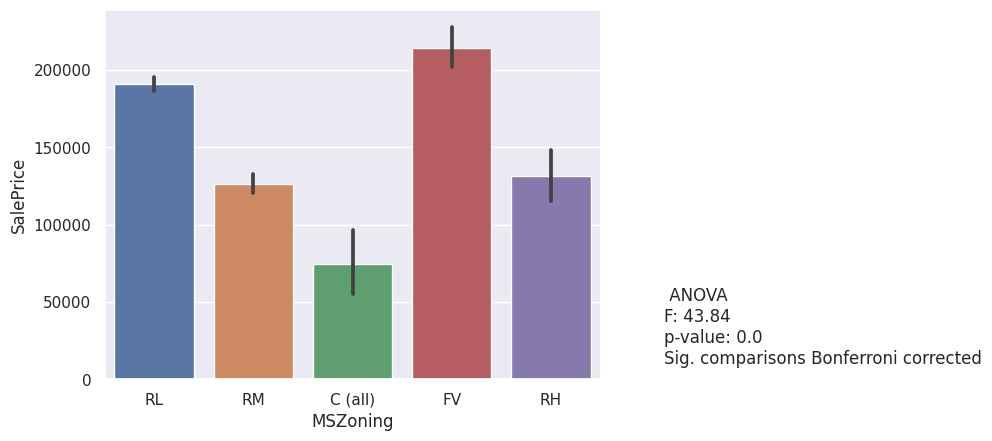

In [139]:
bar_chart(df,'MSZoning', 'SalePrice' )

In [140]:
def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    output_df = pd.DataFrame(columns=['r', 'F', 'X2', 'p-value'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum() == 0:
                if pd.api.types.is_numeric_dtype(df[col]):
                    r,p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = [round(r, 3), np.nan, np.nan, round(p, 3)]
                    scatter(df[col], df[label])
                else:
                    F, p = anova(df[[col, label]], col, label)
                    output_df.loc[col] = [np.nan, round(F, 3), np.nan, round(p, 3)]
                    bar_chart(df, col, label)
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, "nulls"]
                
    sorted_by_f = output_df.loc[output_df.F.abs().sort_values(ascending=False).index]
    output_df = sorted_by_f.reindex(sorted_by_f.r.abs().sort_values(ascending=False).index)
    
    return output_df

Unable to calculate white hetroscedasticity


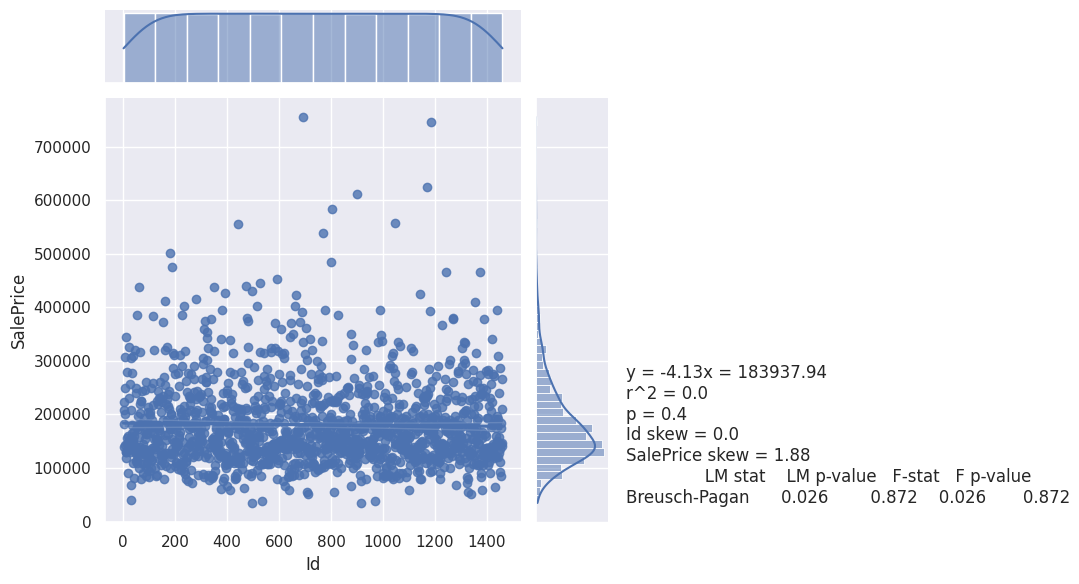

Unable to calculate white hetroscedasticity


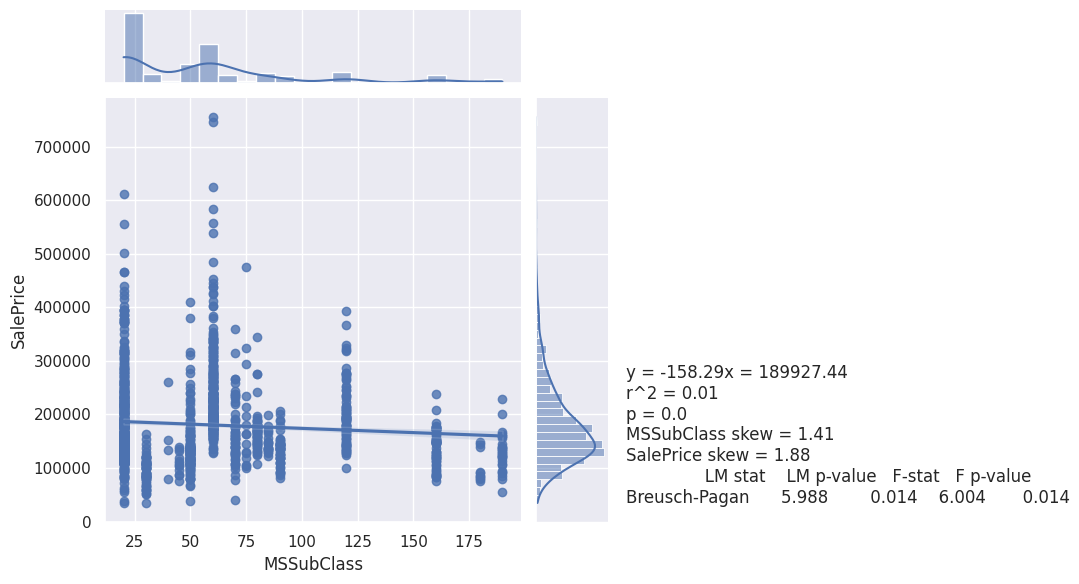

 RL n= 1151; and RM n=218; No ttest performed
 RL n= 1151; and C (all) n=10; No ttest performed
 RL n= 1151; and FV n=65; No ttest performed
 RL n= 1151; and RH n=16; No ttest performed
 RM n= 218; and C (all) n=10; No ttest performed
 RM n= 218; and FV n=65; No ttest performed
 RM n= 218; and RH n=16; No ttest performed
 C (all) n= 10; and FV n=65; No ttest performed
 C (all) n= 10; and RH n=16; No ttest performed
 FV n= 65; and RH n=16; No ttest performed


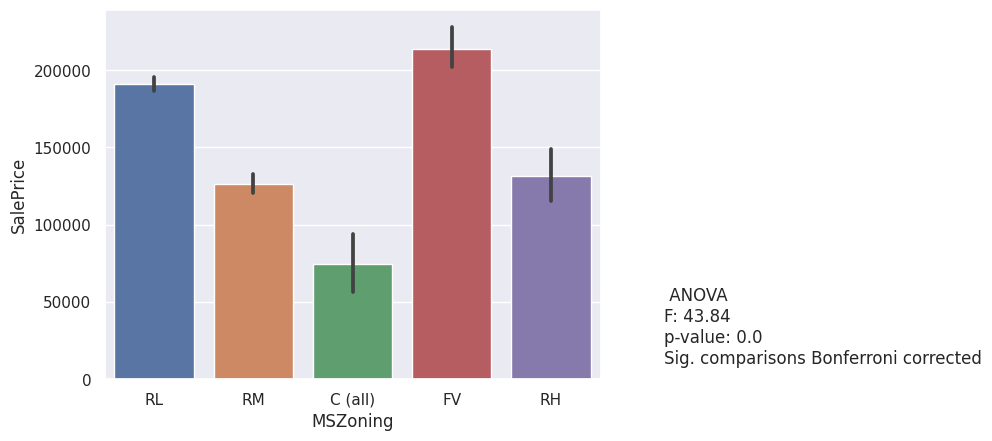

Unable to calculate white hetroscedasticity


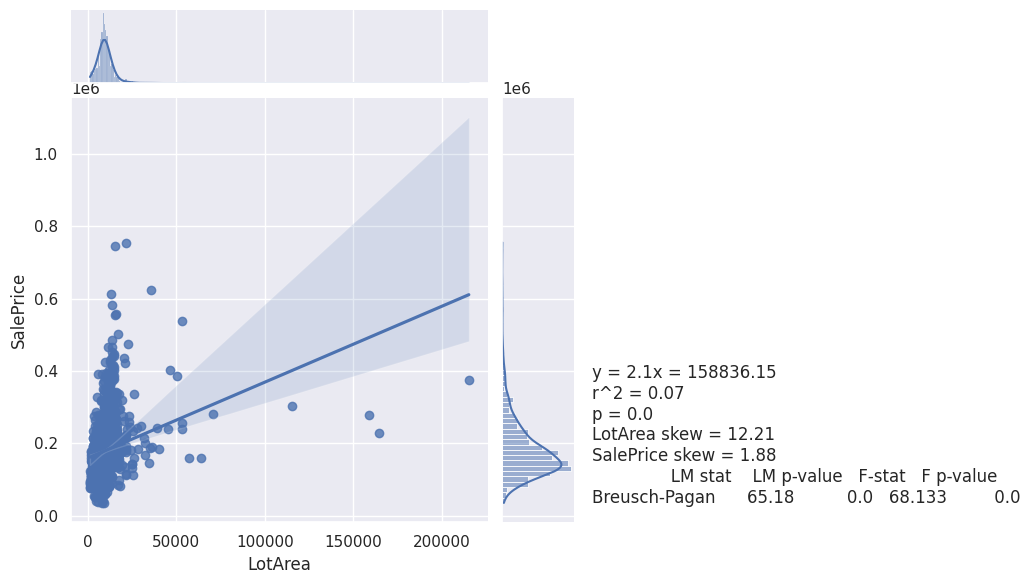

 Pave n= 1454; and Grvl n=6; No ttest performed


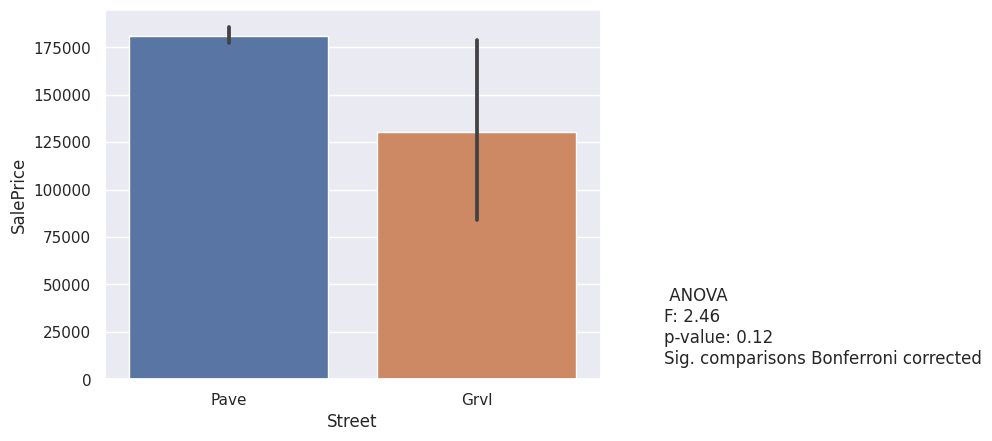

 Reg n= 925; and IR1 n=484; No ttest performed
 Reg n= 925; and IR2 n=41; No ttest performed
 Reg n= 925; and IR3 n=10; No ttest performed
 IR1 n= 484; and IR2 n=41; No ttest performed
 IR1 n= 484; and IR3 n=10; No ttest performed
 IR2 n= 41; and IR3 n=10; No ttest performed


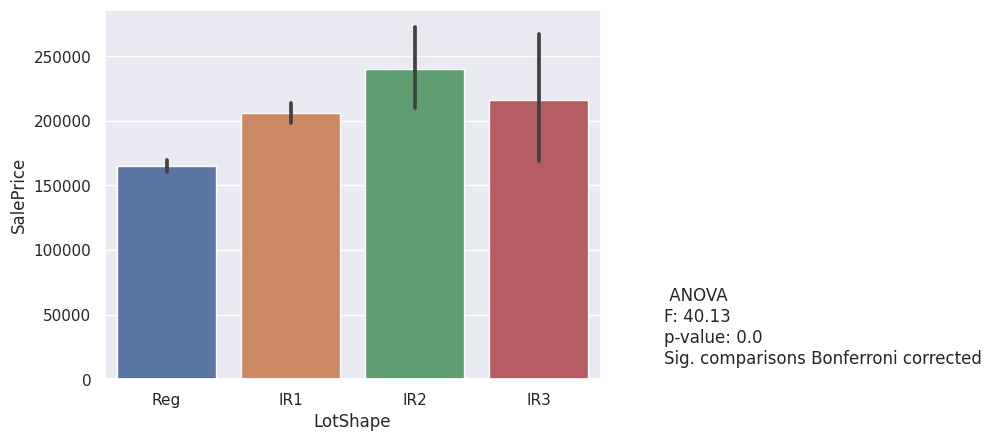

 Lvl n= 1311; and Bnk n=63; No ttest performed
 Lvl n= 1311; and Low n=36; No ttest performed
 Lvl n= 1311; and HLS n=50; No ttest performed
 Bnk n= 63; and Low n=36; No ttest performed
 Bnk n= 63; and HLS n=50; No ttest performed
 Low n= 36; and HLS n=50; No ttest performed


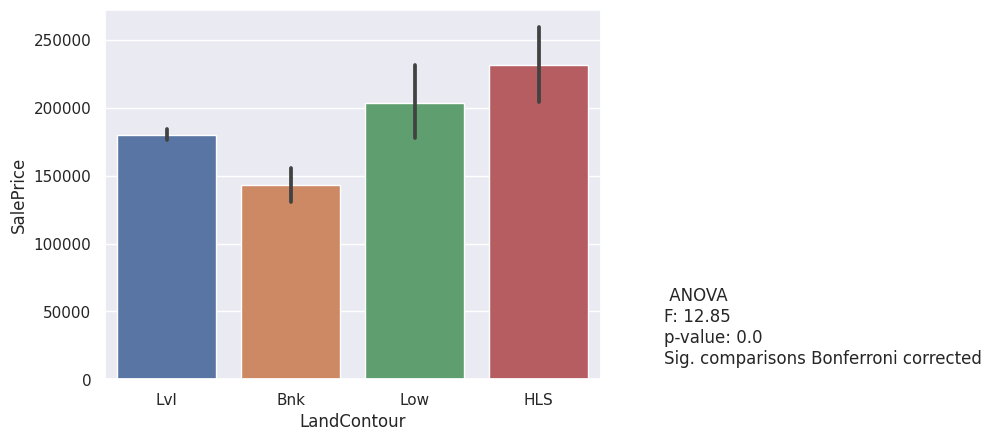

 AllPub n= 1459; and NoSeWa n=1; No ttest performed


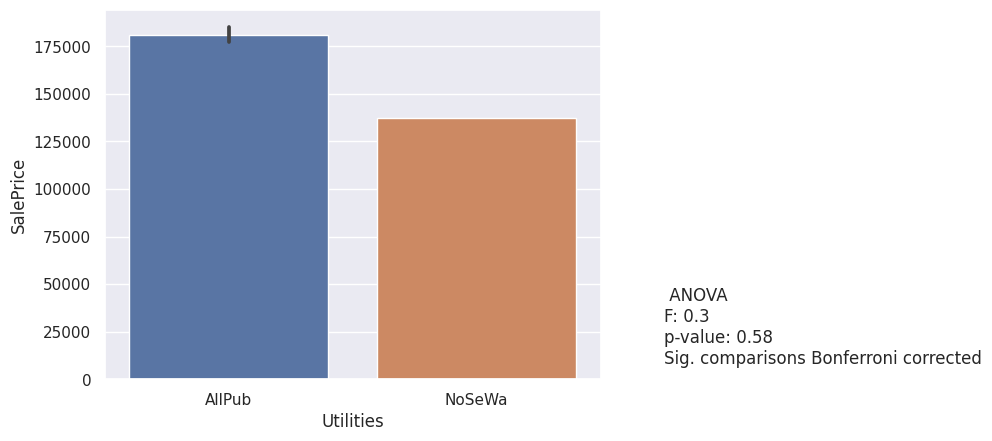

 Inside n= 1052; and FR2 n=47; No ttest performed
 Inside n= 1052; and Corner n=263; No ttest performed
 Inside n= 1052; and CulDSac n=94; No ttest performed
 Inside n= 1052; and FR3 n=4; No ttest performed
 FR2 n= 47; and Corner n=263; No ttest performed
 FR2 n= 47; and CulDSac n=94; No ttest performed
 FR2 n= 47; and FR3 n=4; No ttest performed
 Corner n= 263; and CulDSac n=94; No ttest performed
 Corner n= 263; and FR3 n=4; No ttest performed
 CulDSac n= 94; and FR3 n=4; No ttest performed


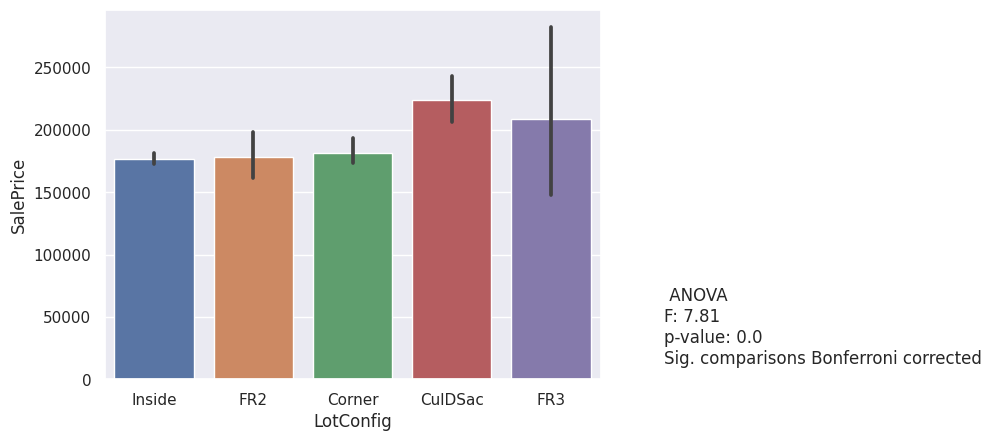

 Gtl n= 1382; and Mod n=65; No ttest performed
 Gtl n= 1382; and Sev n=13; No ttest performed
 Mod n= 65; and Sev n=13; No ttest performed


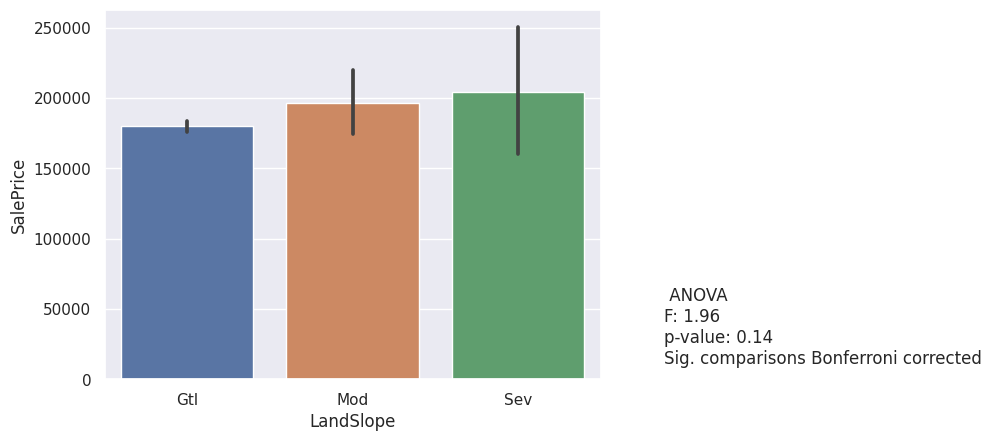

 CollgCr n= 150; and Veenker n=11; No ttest performed
 CollgCr n= 150; and Crawfor n=51; No ttest performed
 CollgCr n= 150; and NoRidge n=41; No ttest performed
 CollgCr n= 150; and Mitchel n=49; No ttest performed
 CollgCr n= 150; and Somerst n=86; No ttest performed
 CollgCr n= 150; and NWAmes n=73; No ttest performed
 CollgCr n= 150; and OldTown n=113; No ttest performed
 CollgCr n= 150; and BrkSide n=58; No ttest performed
 CollgCr n= 150; and Sawyer n=74; No ttest performed
 CollgCr n= 150; and NridgHt n=77; No ttest performed
 CollgCr n= 150; and NAmes n=225; No ttest performed
 CollgCr n= 150; and SawyerW n=59; No ttest performed
 CollgCr n= 150; and IDOTRR n=37; No ttest performed
 CollgCr n= 150; and MeadowV n=17; No ttest performed
 CollgCr n= 150; and Edwards n=100; No ttest performed
 CollgCr n= 150; and Timber n=38; No ttest performed
 CollgCr n= 150; and Gilbert n=79; No ttest performed
 CollgCr n= 150; and StoneBr n=25; No ttest performed
 CollgCr n= 150; and ClearCr n=

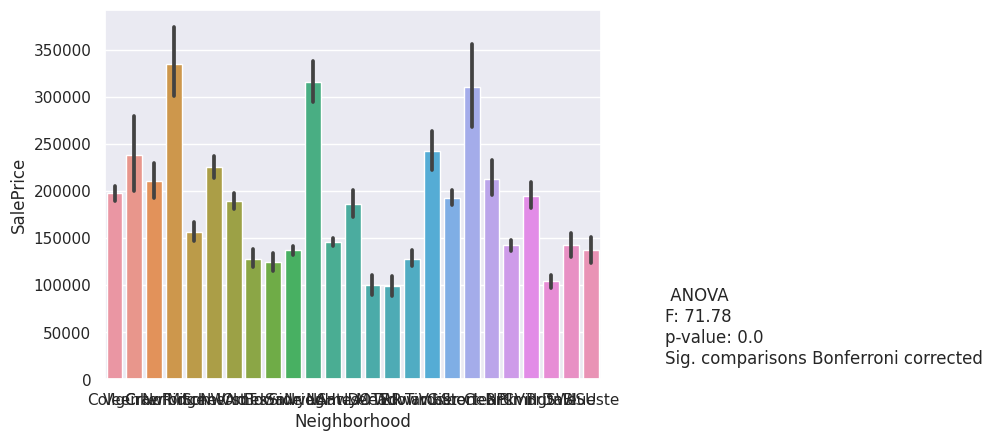

 Norm n= 1260; and Feedr n=81; No ttest performed
 Norm n= 1260; and PosN n=19; No ttest performed
 Norm n= 1260; and Artery n=48; No ttest performed
 Norm n= 1260; and RRAe n=11; No ttest performed
 Norm n= 1260; and RRNn n=5; No ttest performed
 Norm n= 1260; and RRAn n=26; No ttest performed
 Norm n= 1260; and PosA n=8; No ttest performed
 Norm n= 1260; and RRNe n=2; No ttest performed
 Feedr n= 81; and PosN n=19; No ttest performed
 Feedr n= 81; and Artery n=48; No ttest performed
 Feedr n= 81; and RRAe n=11; No ttest performed
 Feedr n= 81; and RRNn n=5; No ttest performed
 Feedr n= 81; and RRAn n=26; No ttest performed
 Feedr n= 81; and PosA n=8; No ttest performed
 Feedr n= 81; and RRNe n=2; No ttest performed
 PosN n= 19; and Artery n=48; No ttest performed
 PosN n= 19; and RRAe n=11; No ttest performed
 PosN n= 19; and RRNn n=5; No ttest performed
 PosN n= 19; and RRAn n=26; No ttest performed
 PosN n= 19; and PosA n=8; No ttest performed
 PosN n= 19; and RRNe n=2; No ttest pe

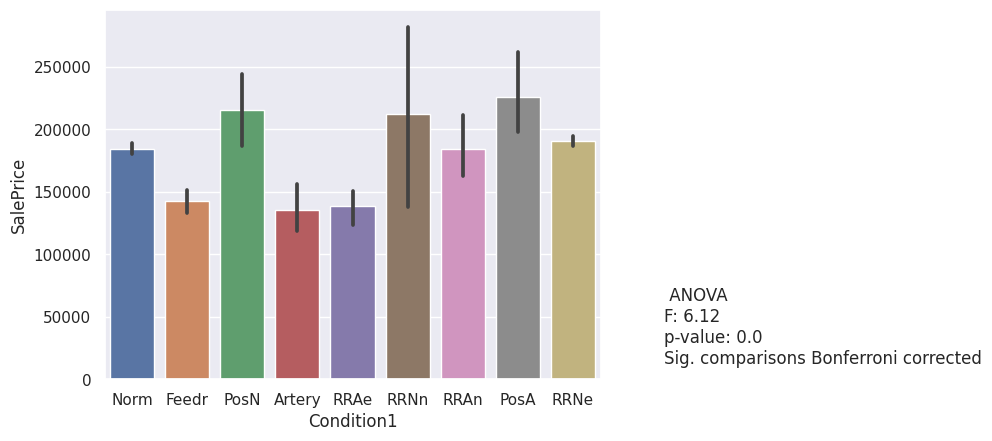

 Norm n= 1445; and Artery n=2; No ttest performed
 Norm n= 1445; and RRNn n=2; No ttest performed
 Norm n= 1445; and Feedr n=6; No ttest performed
 Norm n= 1445; and PosN n=2; No ttest performed
 Norm n= 1445; and PosA n=1; No ttest performed
 Norm n= 1445; and RRAn n=1; No ttest performed
 Norm n= 1445; and RRAe n=1; No ttest performed
 Artery n= 2; and RRNn n=2; No ttest performed
 Artery n= 2; and Feedr n=6; No ttest performed
 Artery n= 2; and PosN n=2; No ttest performed
 Artery n= 2; and PosA n=1; No ttest performed
 Artery n= 2; and RRAn n=1; No ttest performed
 Artery n= 2; and RRAe n=1; No ttest performed
 RRNn n= 2; and Feedr n=6; No ttest performed
 RRNn n= 2; and PosN n=2; No ttest performed
 RRNn n= 2; and PosA n=1; No ttest performed
 RRNn n= 2; and RRAn n=1; No ttest performed
 RRNn n= 2; and RRAe n=1; No ttest performed
 Feedr n= 6; and PosN n=2; No ttest performed
 Feedr n= 6; and PosA n=1; No ttest performed
 Feedr n= 6; and RRAn n=1; No ttest performed
 Feedr n= 6; a

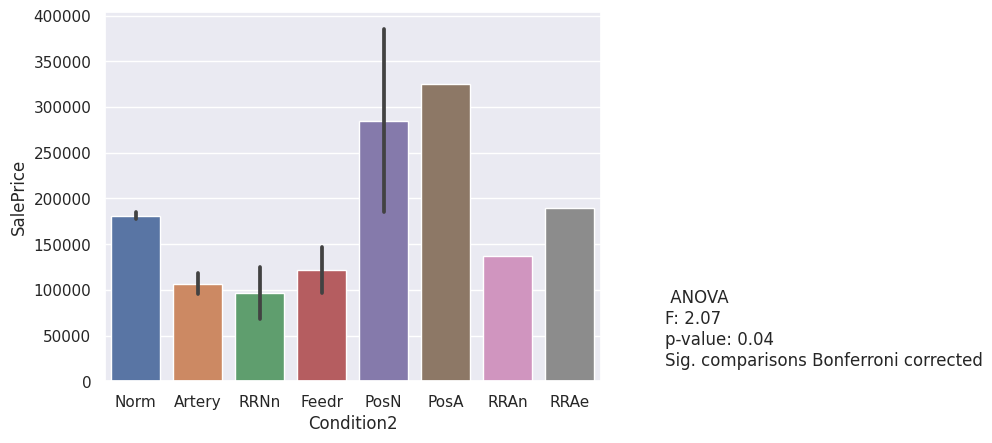

 1Fam n= 1220; and 2fmCon n=31; No ttest performed
 1Fam n= 1220; and Duplex n=52; No ttest performed
 1Fam n= 1220; and TwnhsE n=114; No ttest performed
 1Fam n= 1220; and Twnhs n=43; No ttest performed
 2fmCon n= 31; and Duplex n=52; No ttest performed
 2fmCon n= 31; and TwnhsE n=114; No ttest performed
 2fmCon n= 31; and Twnhs n=43; No ttest performed
 Duplex n= 52; and TwnhsE n=114; No ttest performed
 Duplex n= 52; and Twnhs n=43; No ttest performed
 TwnhsE n= 114; and Twnhs n=43; No ttest performed


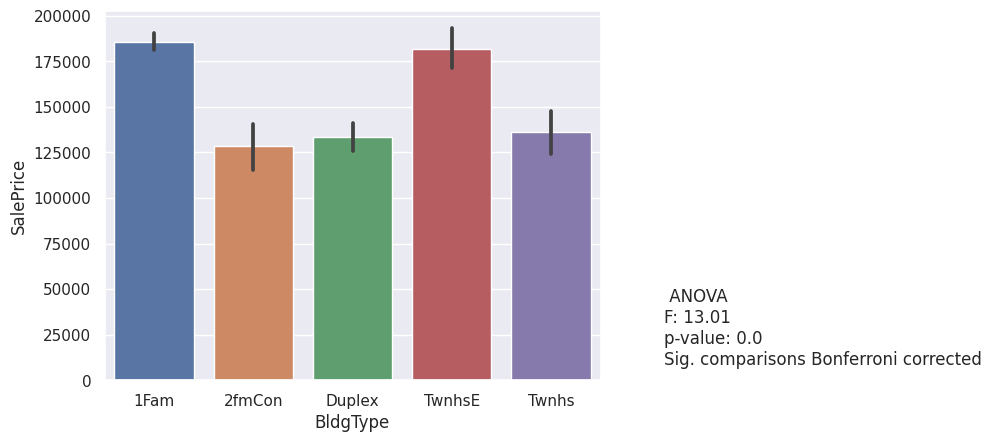

 2Story n= 445; and 1Story n=726; No ttest performed
 2Story n= 445; and 1.5Fin n=154; No ttest performed
 2Story n= 445; and 1.5Unf n=14; No ttest performed
 2Story n= 445; and SFoyer n=37; No ttest performed
 2Story n= 445; and SLvl n=65; No ttest performed
 2Story n= 445; and 2.5Unf n=11; No ttest performed
 2Story n= 445; and 2.5Fin n=8; No ttest performed
 1Story n= 726; and 1.5Fin n=154; No ttest performed
 1Story n= 726; and 1.5Unf n=14; No ttest performed
 1Story n= 726; and SFoyer n=37; No ttest performed
 1Story n= 726; and SLvl n=65; No ttest performed
 1Story n= 726; and 2.5Unf n=11; No ttest performed
 1Story n= 726; and 2.5Fin n=8; No ttest performed
 1.5Fin n= 154; and 1.5Unf n=14; No ttest performed
 1.5Fin n= 154; and SFoyer n=37; No ttest performed
 1.5Fin n= 154; and SLvl n=65; No ttest performed
 1.5Fin n= 154; and 2.5Unf n=11; No ttest performed
 1.5Fin n= 154; and 2.5Fin n=8; No ttest performed
 1.5Unf n= 14; and SFoyer n=37; No ttest performed
 1.5Unf n= 14; and 

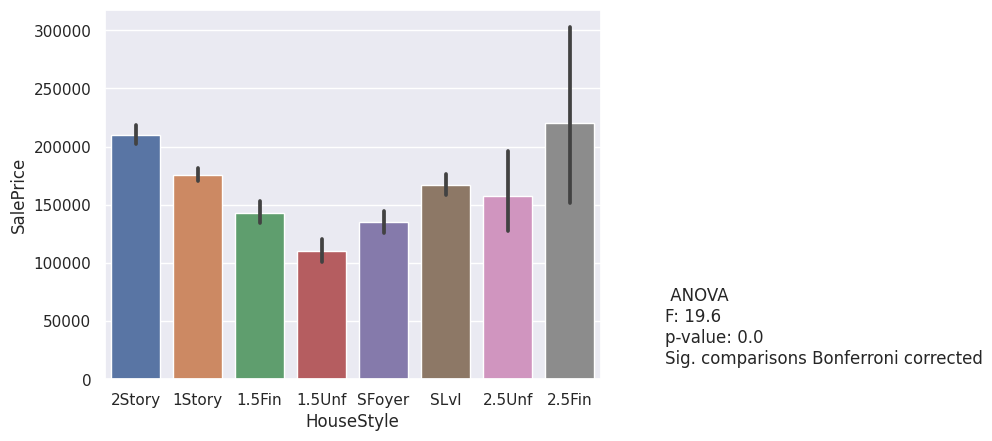

Unable to calculate white hetroscedasticity


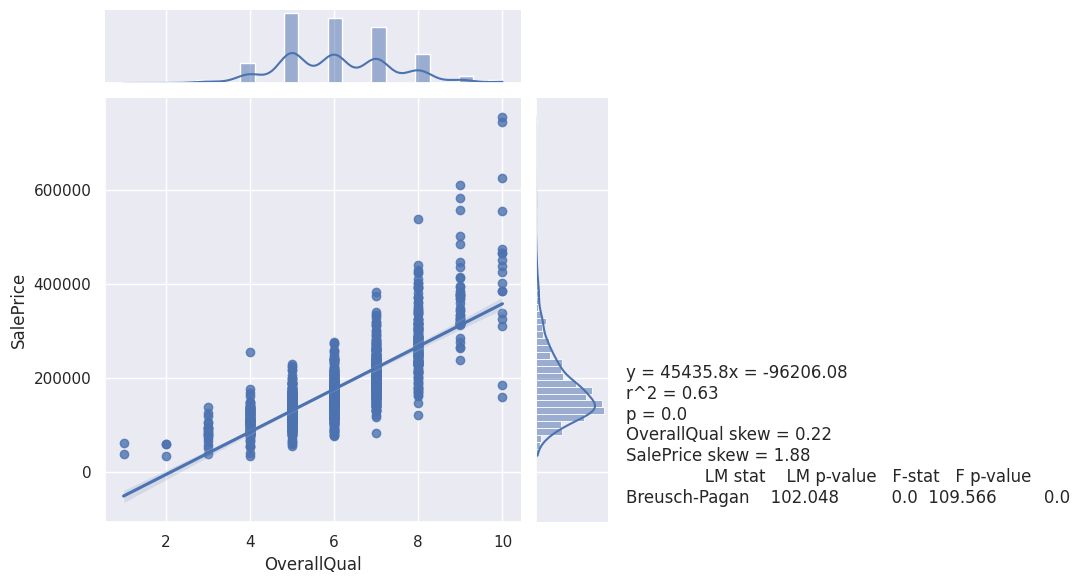

Unable to calculate white hetroscedasticity


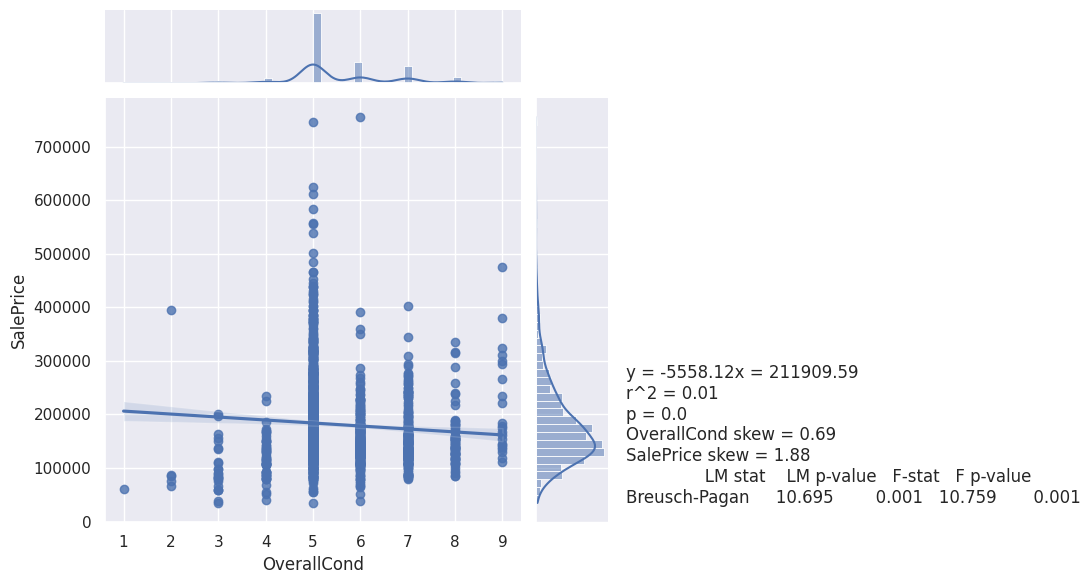

Unable to calculate white hetroscedasticity


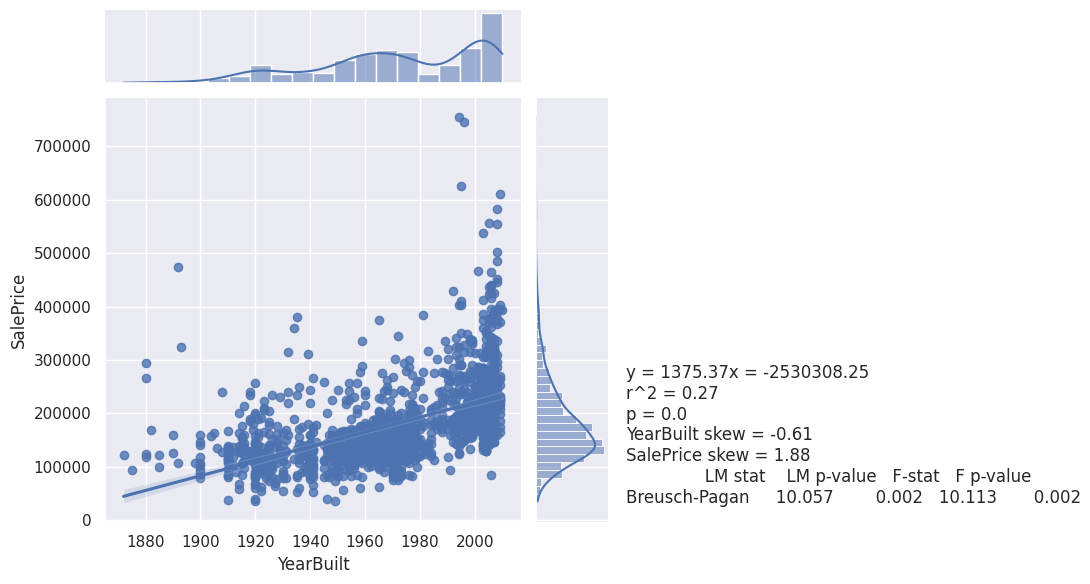

Unable to calculate white hetroscedasticity


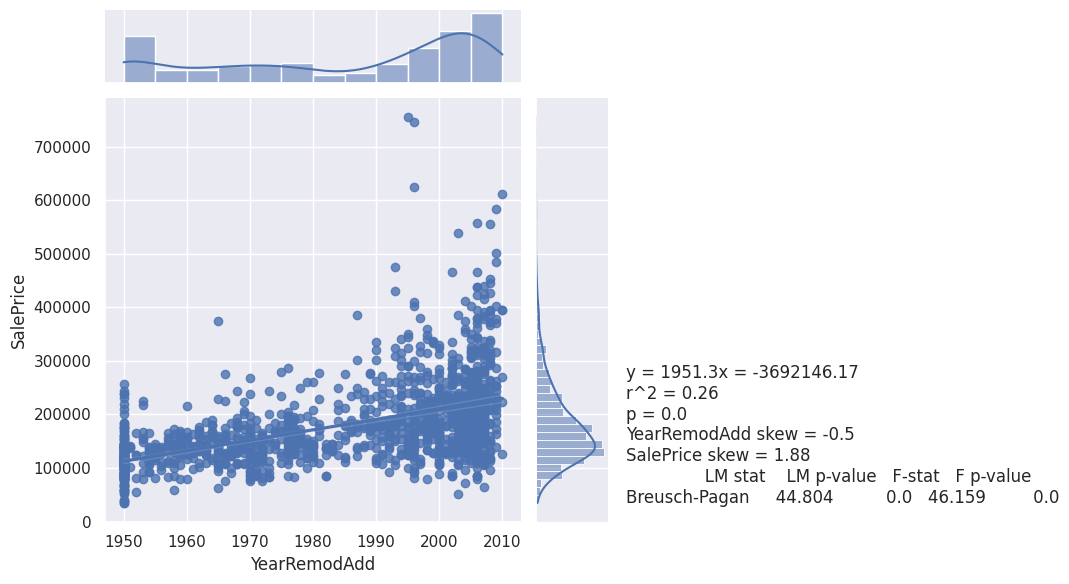

 Gable n= 1141; and Hip n=286; No ttest performed
 Gable n= 1141; and Gambrel n=11; No ttest performed
 Gable n= 1141; and Mansard n=7; No ttest performed
 Gable n= 1141; and Flat n=13; No ttest performed
 Gable n= 1141; and Shed n=2; No ttest performed
 Hip n= 286; and Gambrel n=11; No ttest performed
 Hip n= 286; and Mansard n=7; No ttest performed
 Hip n= 286; and Flat n=13; No ttest performed
 Hip n= 286; and Shed n=2; No ttest performed
 Gambrel n= 11; and Mansard n=7; No ttest performed
 Gambrel n= 11; and Flat n=13; No ttest performed
 Gambrel n= 11; and Shed n=2; No ttest performed
 Mansard n= 7; and Flat n=13; No ttest performed
 Mansard n= 7; and Shed n=2; No ttest performed
 Flat n= 13; and Shed n=2; No ttest performed


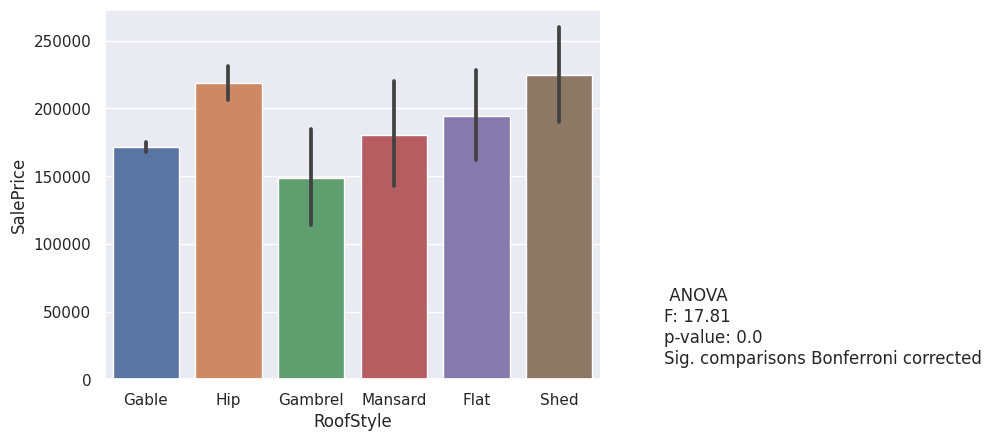

 CompShg n= 1434; and WdShngl n=6; No ttest performed
 CompShg n= 1434; and Metal n=1; No ttest performed
 CompShg n= 1434; and WdShake n=5; No ttest performed
 CompShg n= 1434; and Membran n=1; No ttest performed
 CompShg n= 1434; and Tar&Grv n=11; No ttest performed
 CompShg n= 1434; and Roll n=1; No ttest performed
 CompShg n= 1434; and ClyTile n=1; No ttest performed
 WdShngl n= 6; and Metal n=1; No ttest performed
 WdShngl n= 6; and WdShake n=5; No ttest performed
 WdShngl n= 6; and Membran n=1; No ttest performed
 WdShngl n= 6; and Tar&Grv n=11; No ttest performed
 WdShngl n= 6; and Roll n=1; No ttest performed
 WdShngl n= 6; and ClyTile n=1; No ttest performed
 Metal n= 1; and WdShake n=5; No ttest performed
 Metal n= 1; and Membran n=1; No ttest performed
 Metal n= 1; and Tar&Grv n=11; No ttest performed
 Metal n= 1; and Roll n=1; No ttest performed
 Metal n= 1; and ClyTile n=1; No ttest performed
 WdShake n= 5; and Membran n=1; No ttest performed
 WdShake n= 5; and Tar&Grv n=1

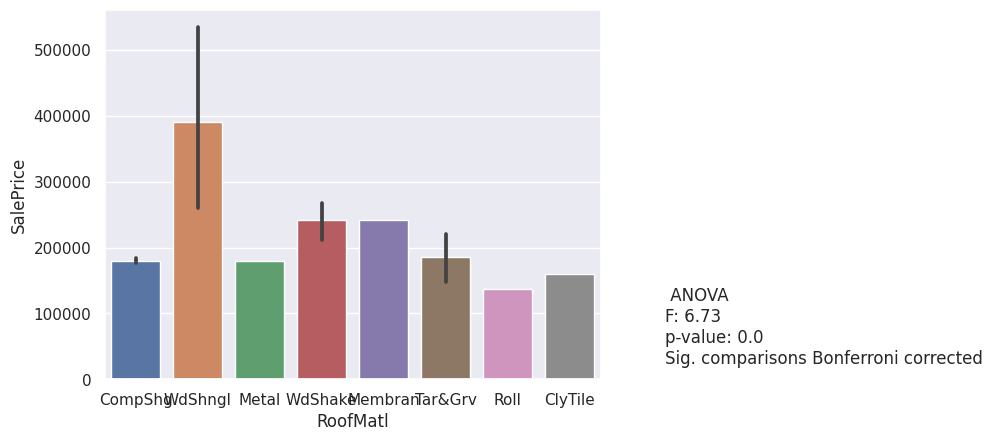

 VinylSd n= 515; and MetalSd n=220; No ttest performed
 VinylSd n= 515; and Wd Sdng n=206; No ttest performed
 VinylSd n= 515; and HdBoard n=222; No ttest performed
 VinylSd n= 515; and BrkFace n=50; No ttest performed
 VinylSd n= 515; and WdShing n=26; No ttest performed
 VinylSd n= 515; and CemntBd n=61; No ttest performed
 VinylSd n= 515; and Plywood n=108; No ttest performed
 VinylSd n= 515; and AsbShng n=20; No ttest performed
 VinylSd n= 515; and Stucco n=25; No ttest performed
 VinylSd n= 515; and BrkComm n=2; No ttest performed
 VinylSd n= 515; and AsphShn n=1; No ttest performed
 VinylSd n= 515; and Stone n=2; No ttest performed
 VinylSd n= 515; and ImStucc n=1; No ttest performed
 VinylSd n= 515; and CBlock n=1; No ttest performed
 MetalSd n= 220; and Wd Sdng n=206; No ttest performed
 MetalSd n= 220; and HdBoard n=222; No ttest performed
 MetalSd n= 220; and BrkFace n=50; No ttest performed
 MetalSd n= 220; and WdShing n=26; No ttest performed
 MetalSd n= 220; and CemntBd n=

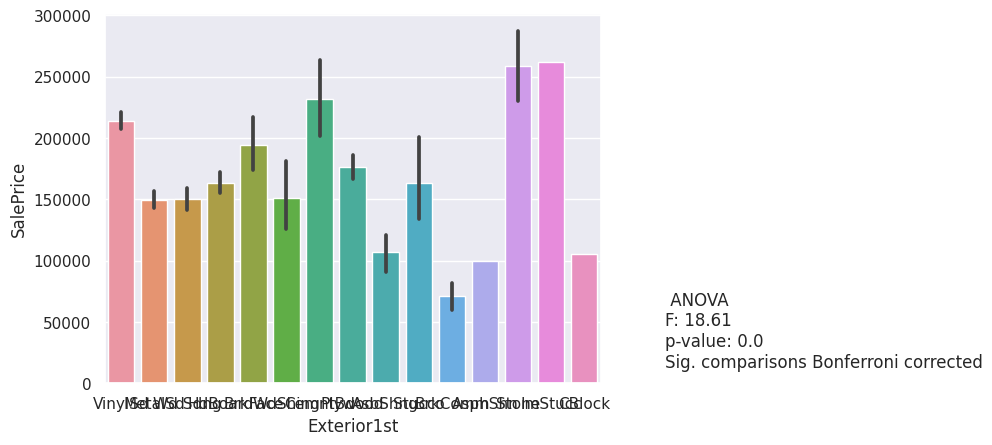

 VinylSd n= 504; and MetalSd n=214; No ttest performed
 VinylSd n= 504; and Wd Shng n=38; No ttest performed
 VinylSd n= 504; and HdBoard n=207; No ttest performed
 VinylSd n= 504; and Plywood n=142; No ttest performed
 VinylSd n= 504; and Wd Sdng n=197; No ttest performed
 VinylSd n= 504; and CmentBd n=60; No ttest performed
 VinylSd n= 504; and BrkFace n=25; No ttest performed
 VinylSd n= 504; and Stucco n=26; No ttest performed
 VinylSd n= 504; and AsbShng n=20; No ttest performed
 VinylSd n= 504; and Brk Cmn n=7; No ttest performed
 VinylSd n= 504; and ImStucc n=10; No ttest performed
 VinylSd n= 504; and AsphShn n=3; No ttest performed
 VinylSd n= 504; and Stone n=5; No ttest performed
 VinylSd n= 504; and Other n=1; No ttest performed
 VinylSd n= 504; and CBlock n=1; No ttest performed
 MetalSd n= 214; and Wd Shng n=38; No ttest performed
 MetalSd n= 214; and HdBoard n=207; No ttest performed
 MetalSd n= 214; and Plywood n=142; No ttest performed
 MetalSd n= 214; and Wd Sdng n=19

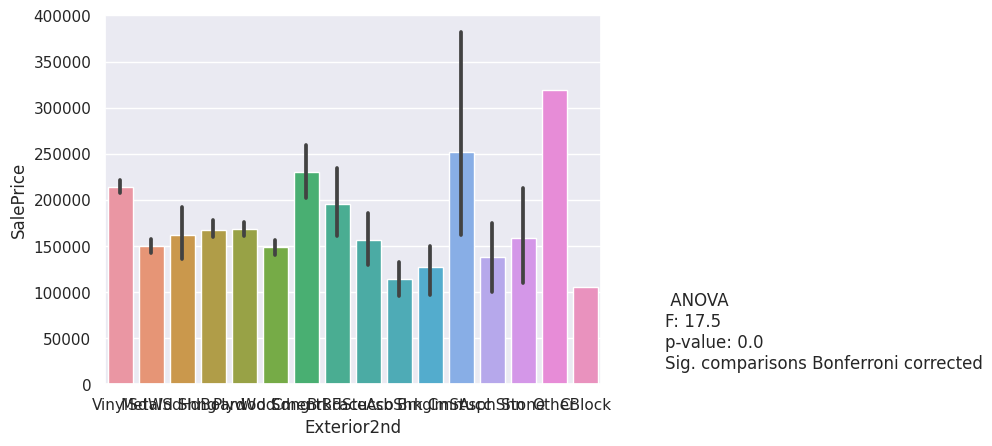

 Gd n= 488; and TA n=906; No ttest performed
 Gd n= 488; and Ex n=52; No ttest performed
 Gd n= 488; and Fa n=14; No ttest performed
 TA n= 906; and Ex n=52; No ttest performed
 TA n= 906; and Fa n=14; No ttest performed
 Ex n= 52; and Fa n=14; No ttest performed


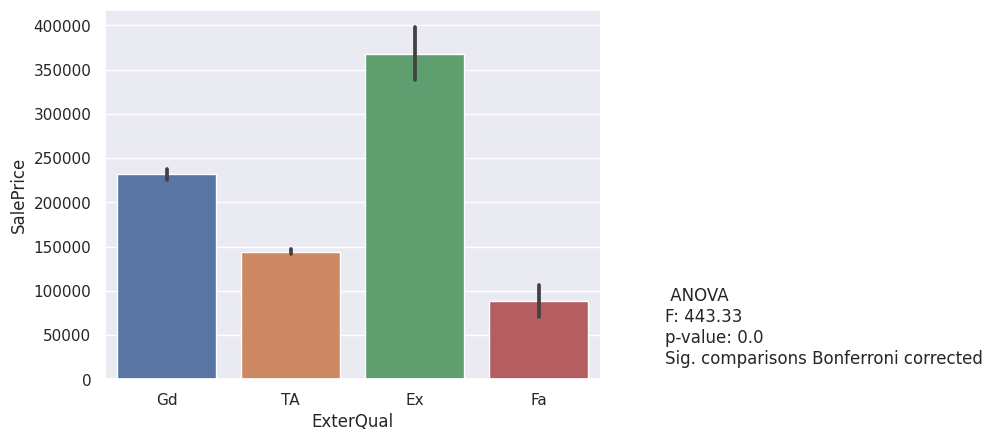

 TA n= 1282; and Gd n=146; No ttest performed
 TA n= 1282; and Fa n=28; No ttest performed
 TA n= 1282; and Po n=1; No ttest performed
 TA n= 1282; and Ex n=3; No ttest performed
 Gd n= 146; and Fa n=28; No ttest performed
 Gd n= 146; and Po n=1; No ttest performed
 Gd n= 146; and Ex n=3; No ttest performed
 Fa n= 28; and Po n=1; No ttest performed
 Fa n= 28; and Ex n=3; No ttest performed
 Po n= 1; and Ex n=3; No ttest performed


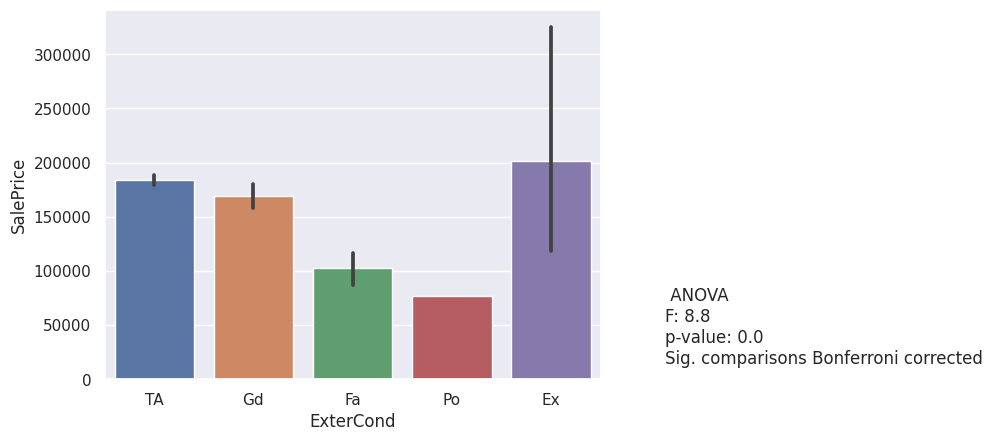

 PConc n= 647; and CBlock n=634; No ttest performed
 PConc n= 647; and BrkTil n=146; No ttest performed
 PConc n= 647; and Wood n=3; No ttest performed
 PConc n= 647; and Slab n=24; No ttest performed
 PConc n= 647; and Stone n=6; No ttest performed
 CBlock n= 634; and BrkTil n=146; No ttest performed
 CBlock n= 634; and Wood n=3; No ttest performed
 CBlock n= 634; and Slab n=24; No ttest performed
 CBlock n= 634; and Stone n=6; No ttest performed
 BrkTil n= 146; and Wood n=3; No ttest performed
 BrkTil n= 146; and Slab n=24; No ttest performed
 BrkTil n= 146; and Stone n=6; No ttest performed
 Wood n= 3; and Slab n=24; No ttest performed
 Wood n= 3; and Stone n=6; No ttest performed
 Slab n= 24; and Stone n=6; No ttest performed


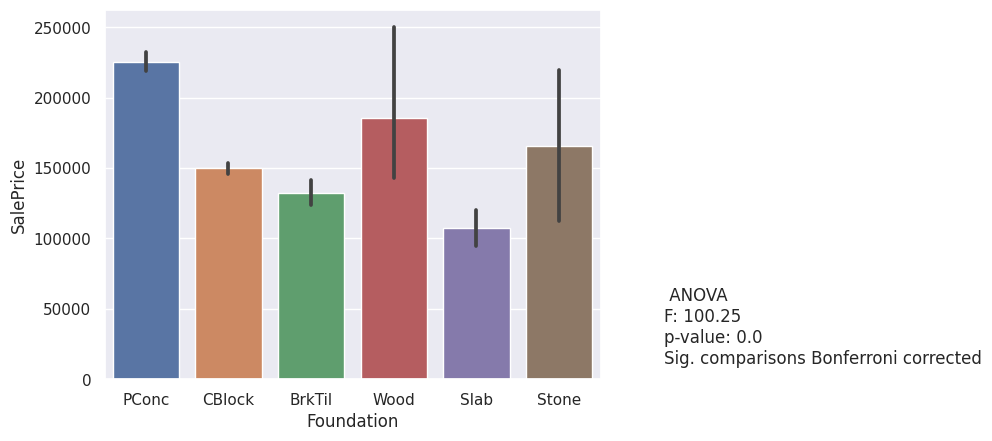

Unable to calculate white hetroscedasticity


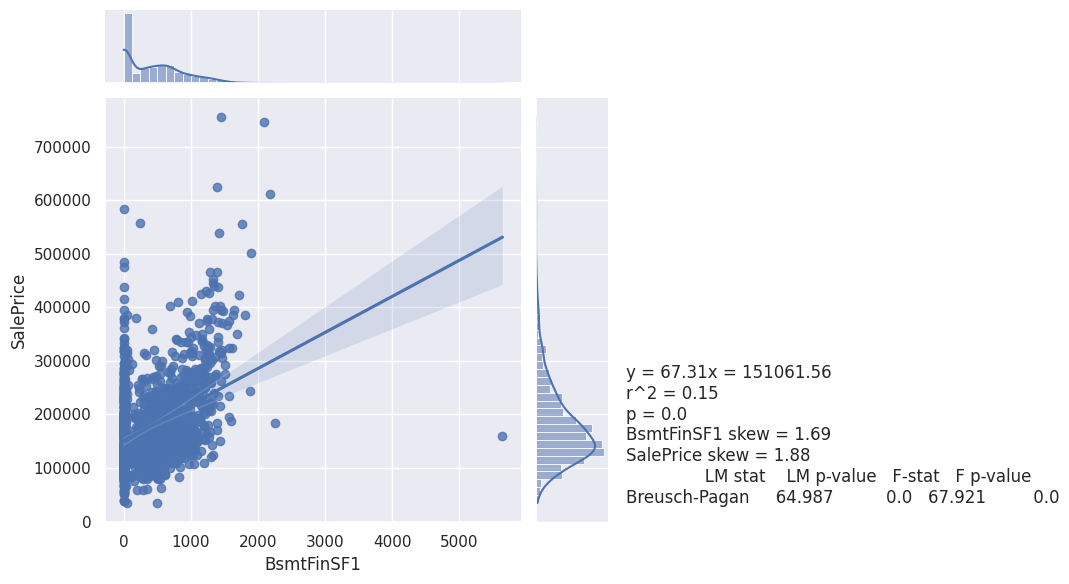

Unable to calculate white hetroscedasticity


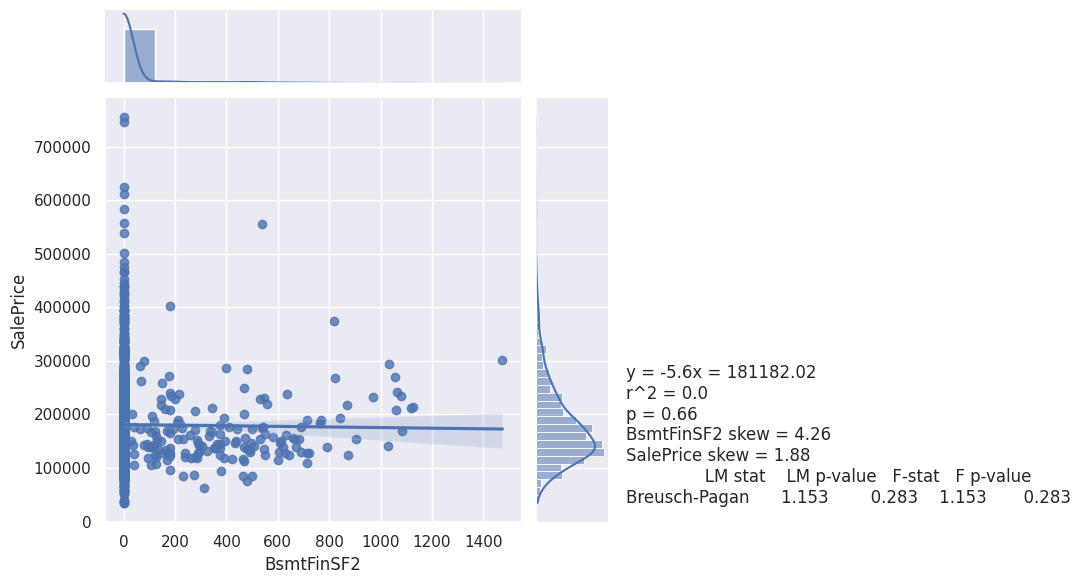

Unable to calculate white hetroscedasticity


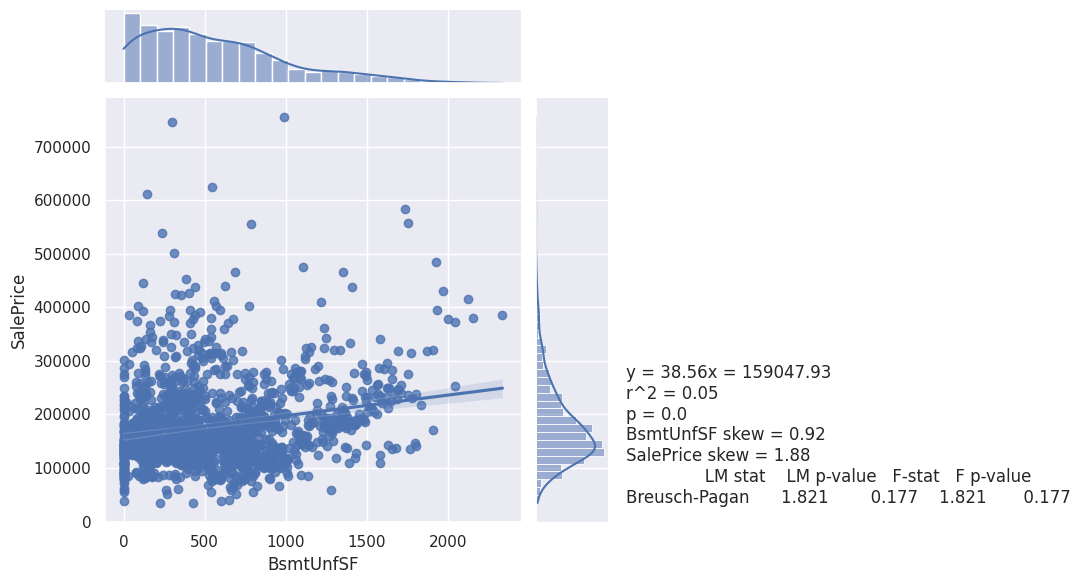

Unable to calculate white hetroscedasticity


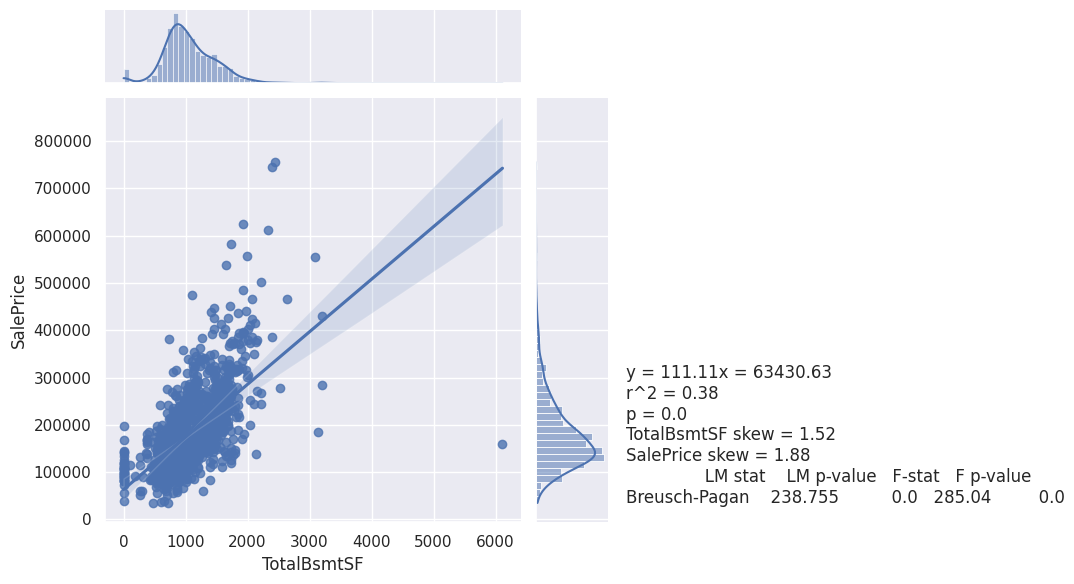

 GasA n= 1428; and GasW n=18; No ttest performed
 GasA n= 1428; and Grav n=7; No ttest performed
 GasA n= 1428; and Wall n=4; No ttest performed
 GasA n= 1428; and OthW n=2; No ttest performed
 GasA n= 1428; and Floor n=1; No ttest performed
 GasW n= 18; and Grav n=7; No ttest performed
 GasW n= 18; and Wall n=4; No ttest performed
 GasW n= 18; and OthW n=2; No ttest performed
 GasW n= 18; and Floor n=1; No ttest performed
 Grav n= 7; and Wall n=4; No ttest performed
 Grav n= 7; and OthW n=2; No ttest performed
 Grav n= 7; and Floor n=1; No ttest performed
 Wall n= 4; and OthW n=2; No ttest performed
 Wall n= 4; and Floor n=1; No ttest performed
 OthW n= 2; and Floor n=1; No ttest performed


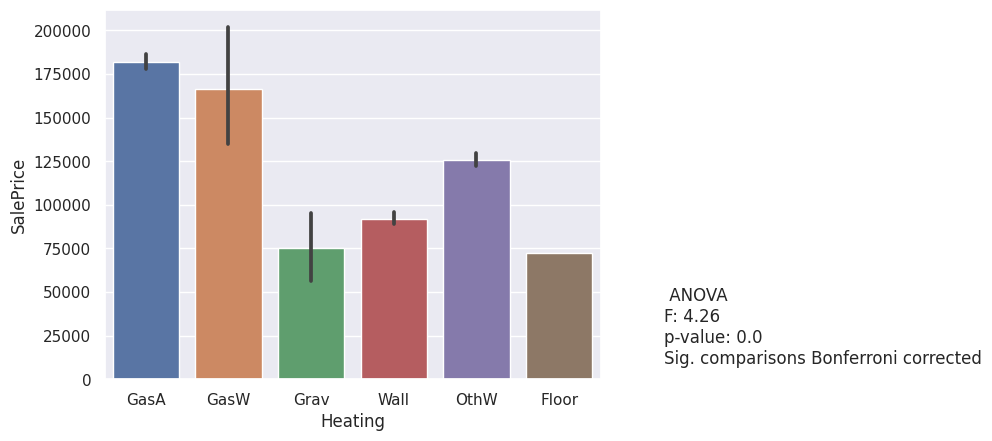

 Ex n= 741; and Gd n=241; No ttest performed
 Ex n= 741; and TA n=428; No ttest performed
 Ex n= 741; and Fa n=49; No ttest performed
 Ex n= 741; and Po n=1; No ttest performed
 Gd n= 241; and TA n=428; No ttest performed
 Gd n= 241; and Fa n=49; No ttest performed
 Gd n= 241; and Po n=1; No ttest performed
 TA n= 428; and Fa n=49; No ttest performed
 TA n= 428; and Po n=1; No ttest performed
 Fa n= 49; and Po n=1; No ttest performed


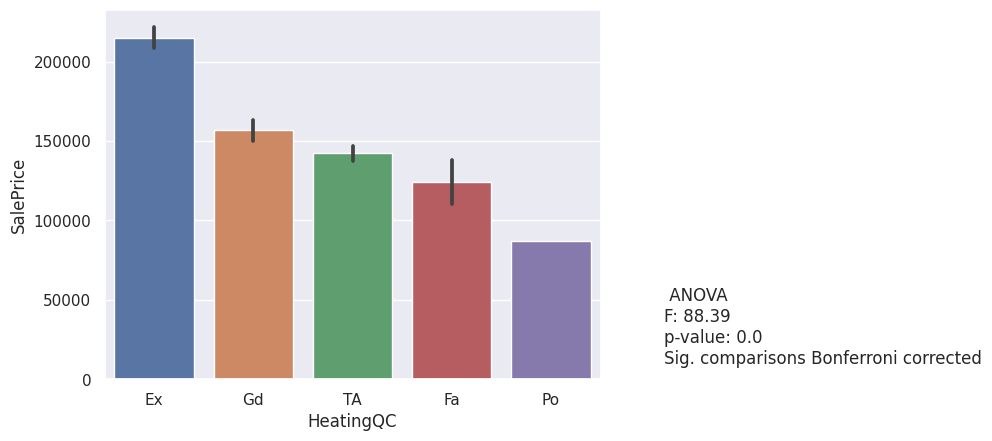

 Y n= 1365; and N n=95; No ttest performed


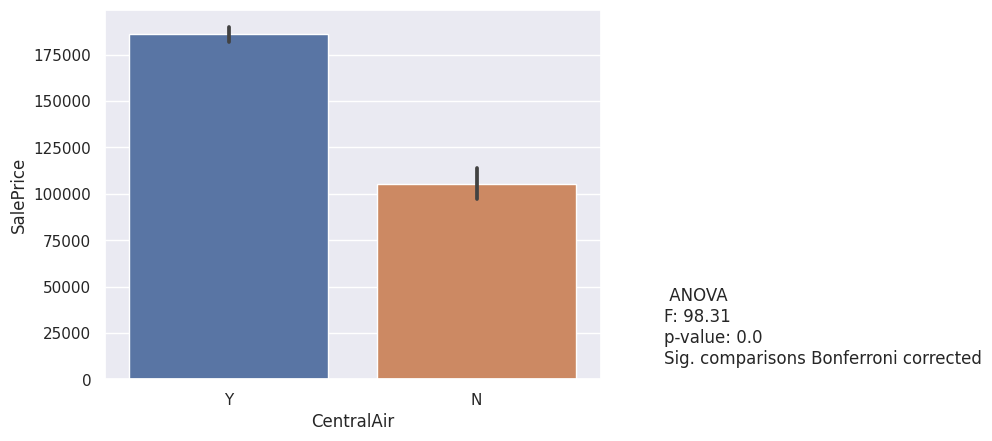

Unable to calculate white hetroscedasticity


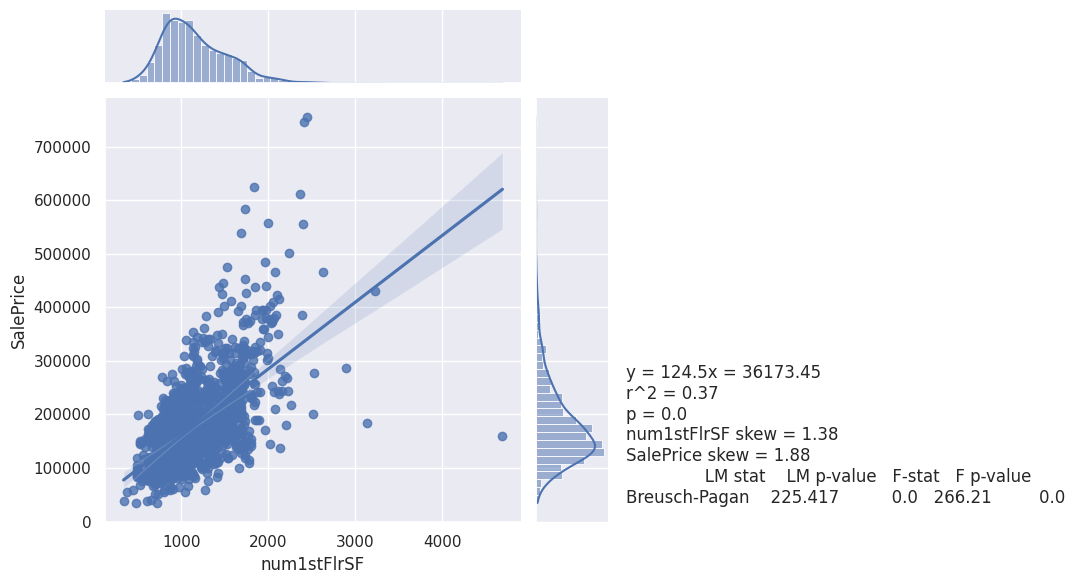

Unable to calculate white hetroscedasticity


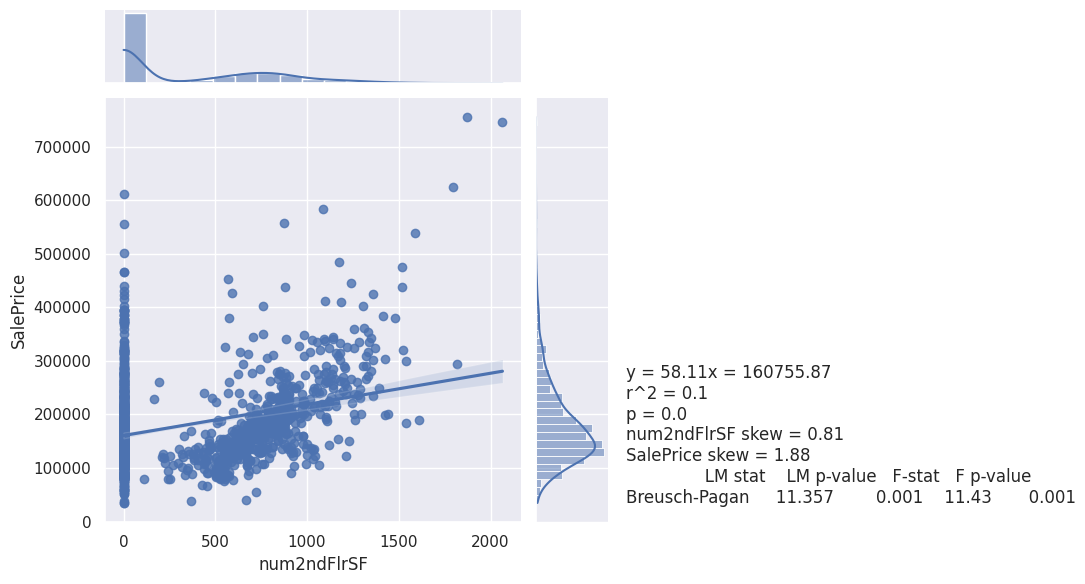

Unable to calculate white hetroscedasticity


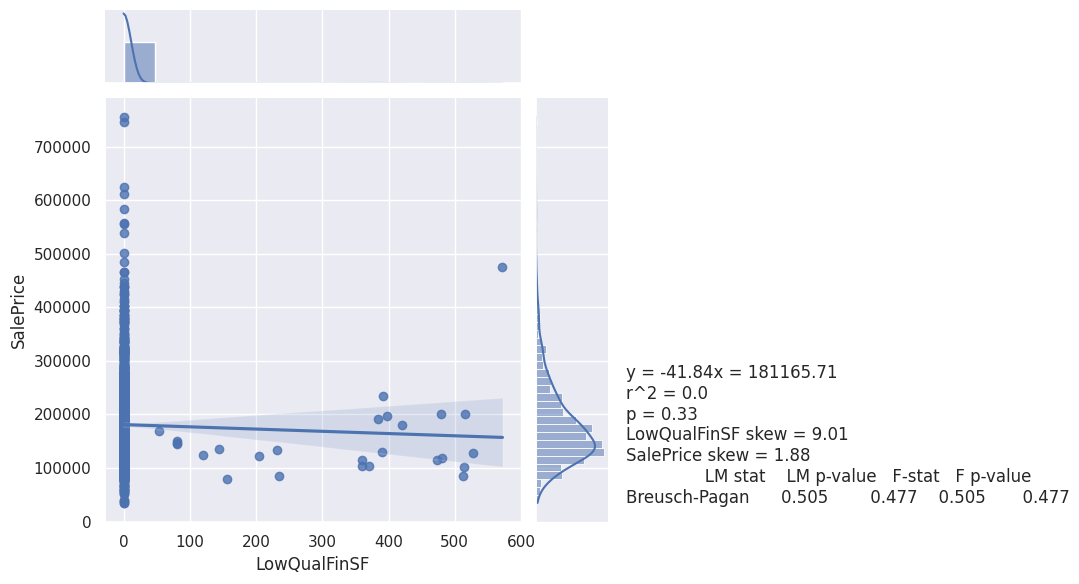

Unable to calculate white hetroscedasticity


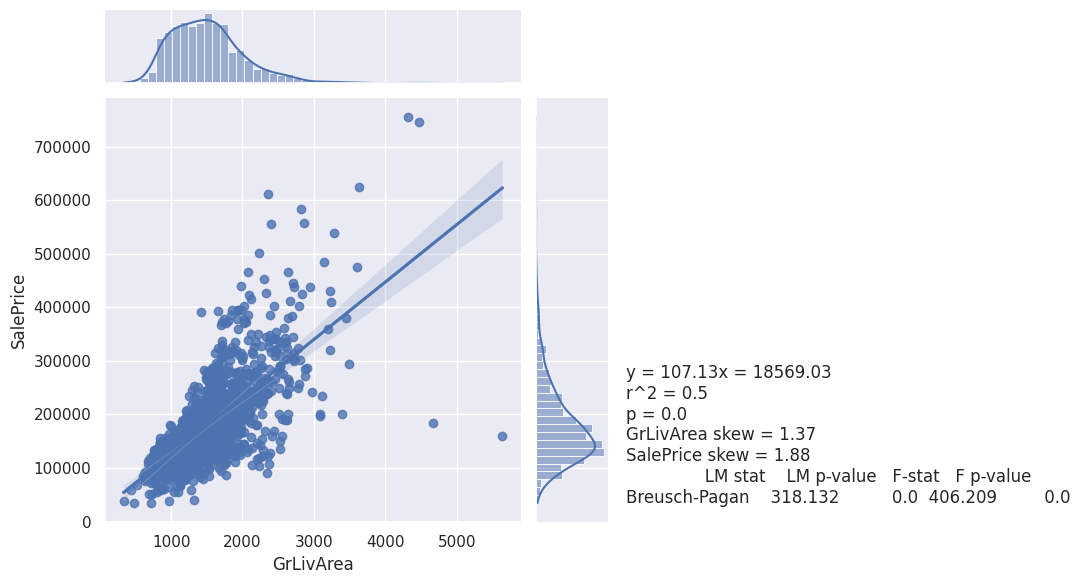

Unable to calculate white hetroscedasticity


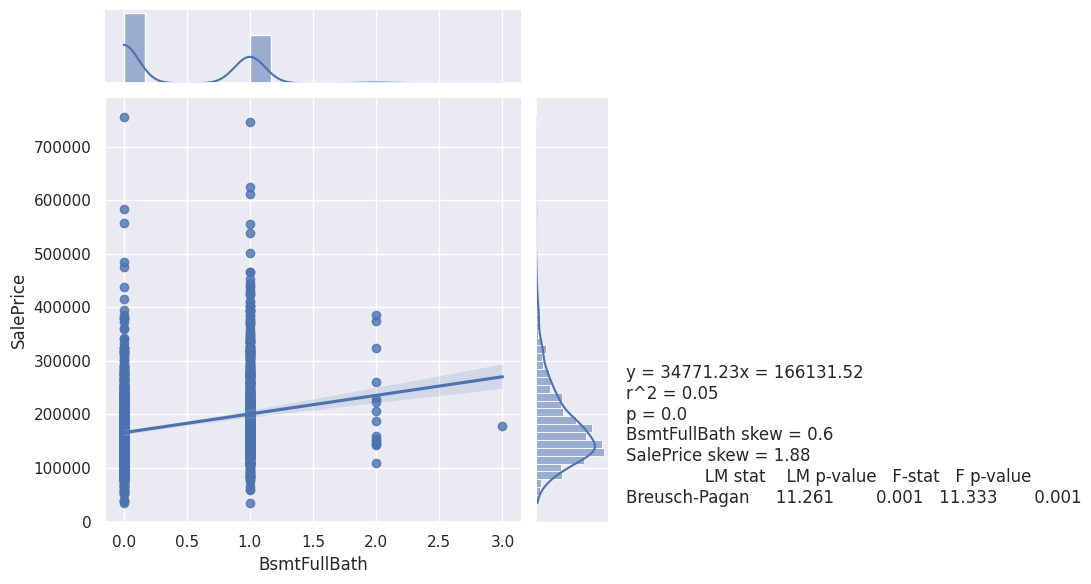

Unable to calculate white hetroscedasticity


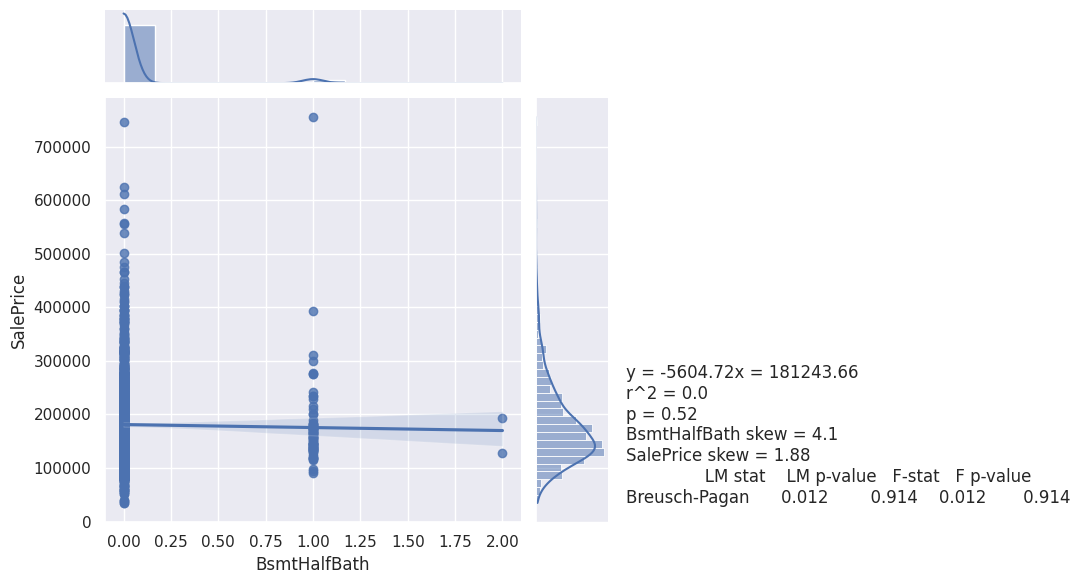

Unable to calculate white hetroscedasticity


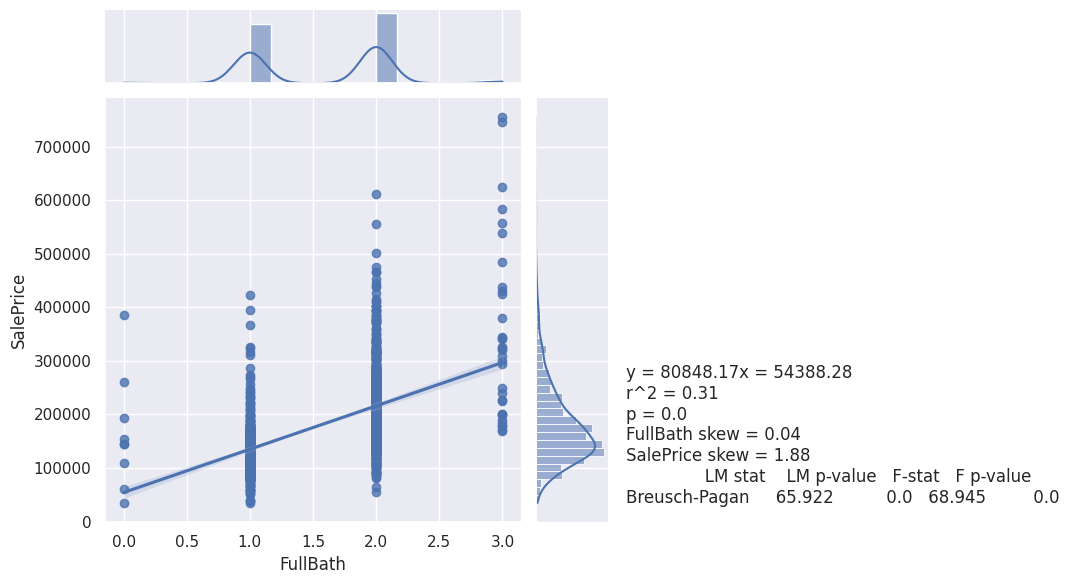

Unable to calculate white hetroscedasticity


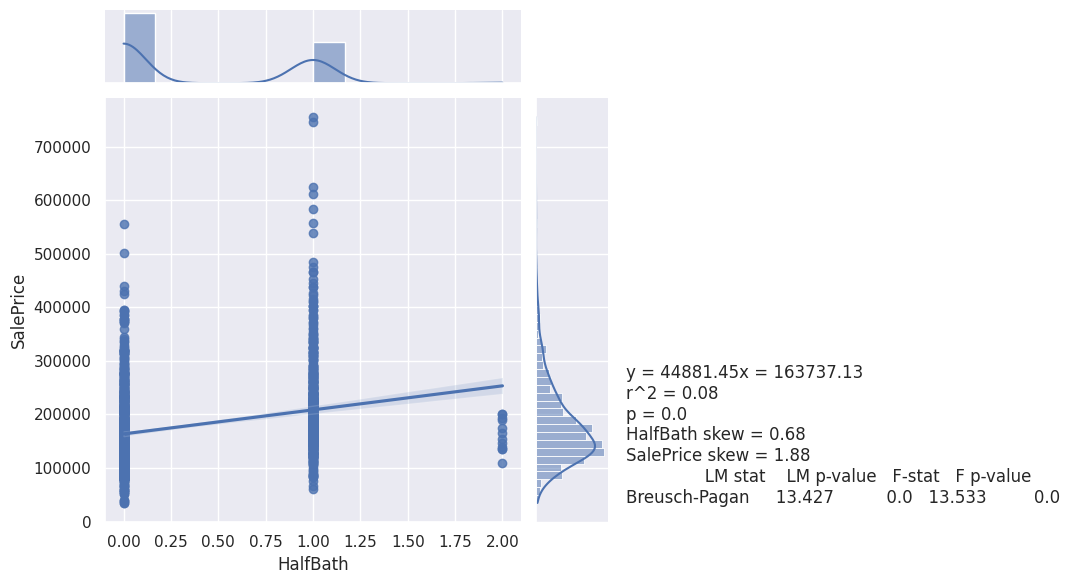

Unable to calculate white hetroscedasticity


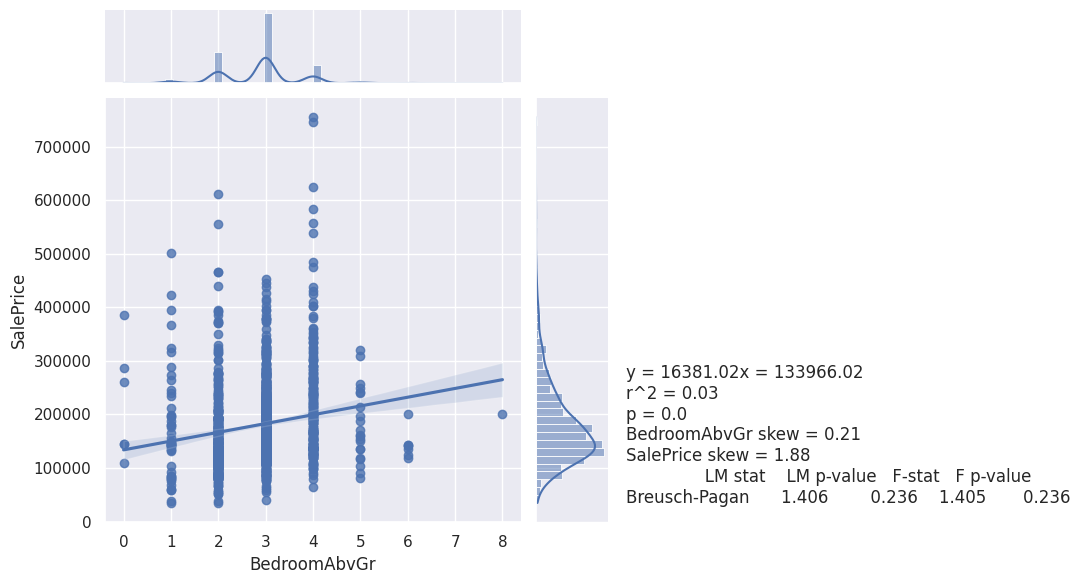

Unable to calculate white hetroscedasticity


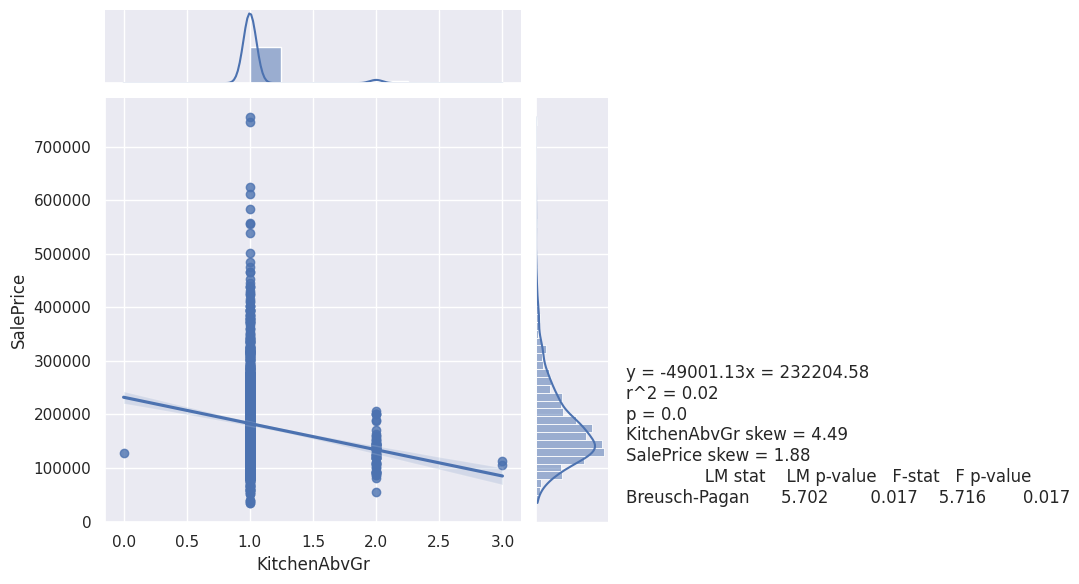

 Gd n= 586; and TA n=735; No ttest performed
 Gd n= 586; and Ex n=100; No ttest performed
 Gd n= 586; and Fa n=39; No ttest performed
 TA n= 735; and Ex n=100; No ttest performed
 TA n= 735; and Fa n=39; No ttest performed
 Ex n= 100; and Fa n=39; No ttest performed


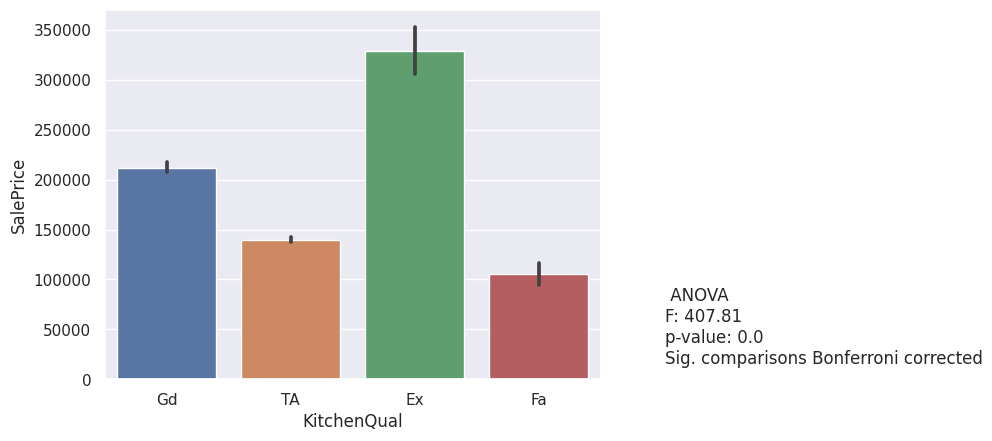

Unable to calculate white hetroscedasticity


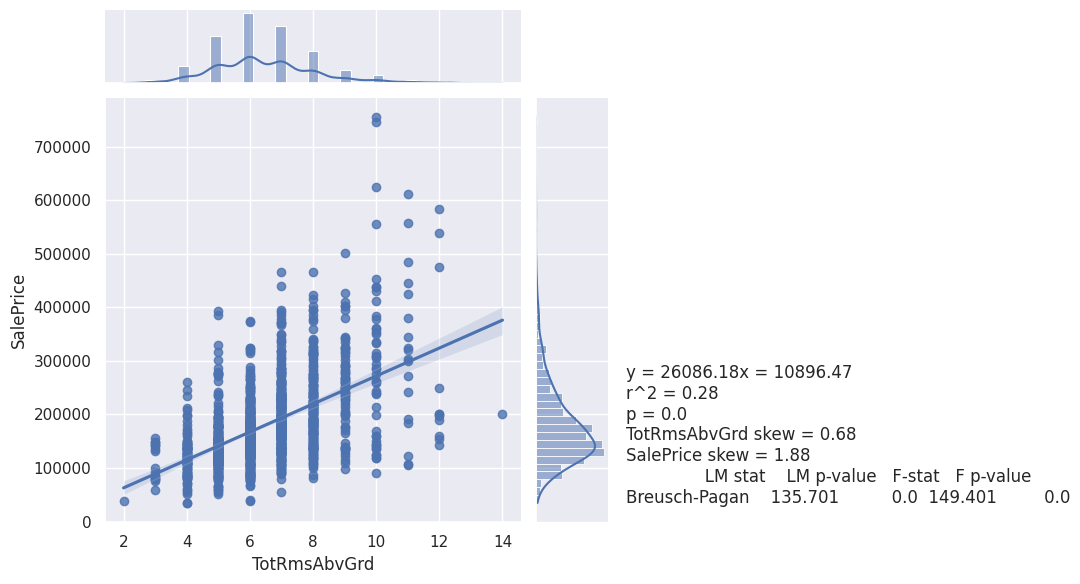

 Typ n= 1360; and Min1 n=31; No ttest performed
 Typ n= 1360; and Maj1 n=14; No ttest performed
 Typ n= 1360; and Min2 n=34; No ttest performed
 Typ n= 1360; and Mod n=15; No ttest performed
 Typ n= 1360; and Maj2 n=5; No ttest performed
 Typ n= 1360; and Sev n=1; No ttest performed
 Min1 n= 31; and Maj1 n=14; No ttest performed
 Min1 n= 31; and Min2 n=34; No ttest performed
 Min1 n= 31; and Mod n=15; No ttest performed
 Min1 n= 31; and Maj2 n=5; No ttest performed
 Min1 n= 31; and Sev n=1; No ttest performed
 Maj1 n= 14; and Min2 n=34; No ttest performed
 Maj1 n= 14; and Mod n=15; No ttest performed
 Maj1 n= 14; and Maj2 n=5; No ttest performed
 Maj1 n= 14; and Sev n=1; No ttest performed
 Min2 n= 34; and Mod n=15; No ttest performed
 Min2 n= 34; and Maj2 n=5; No ttest performed
 Min2 n= 34; and Sev n=1; No ttest performed
 Mod n= 15; and Maj2 n=5; No ttest performed
 Mod n= 15; and Sev n=1; No ttest performed
 Maj2 n= 5; and Sev n=1; No ttest performed


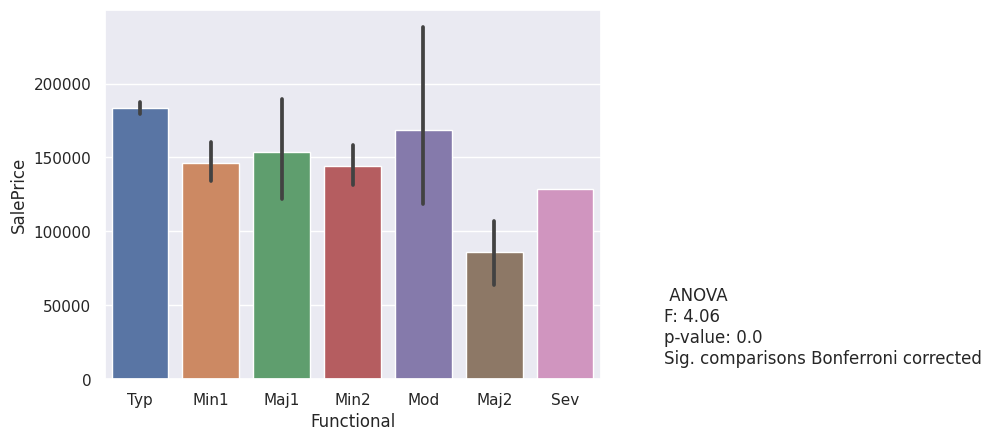

Unable to calculate white hetroscedasticity


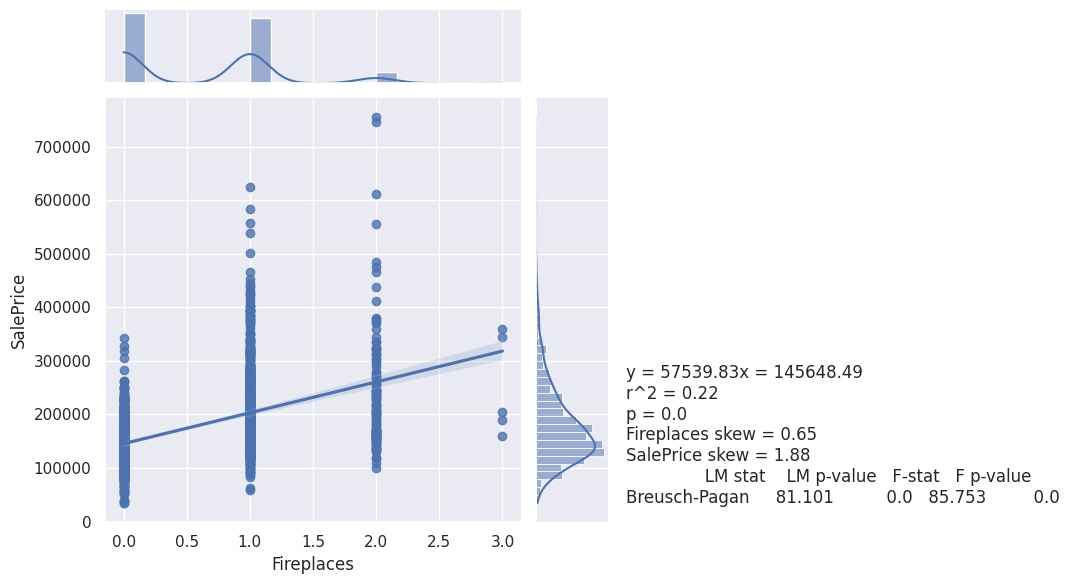

Unable to calculate white hetroscedasticity


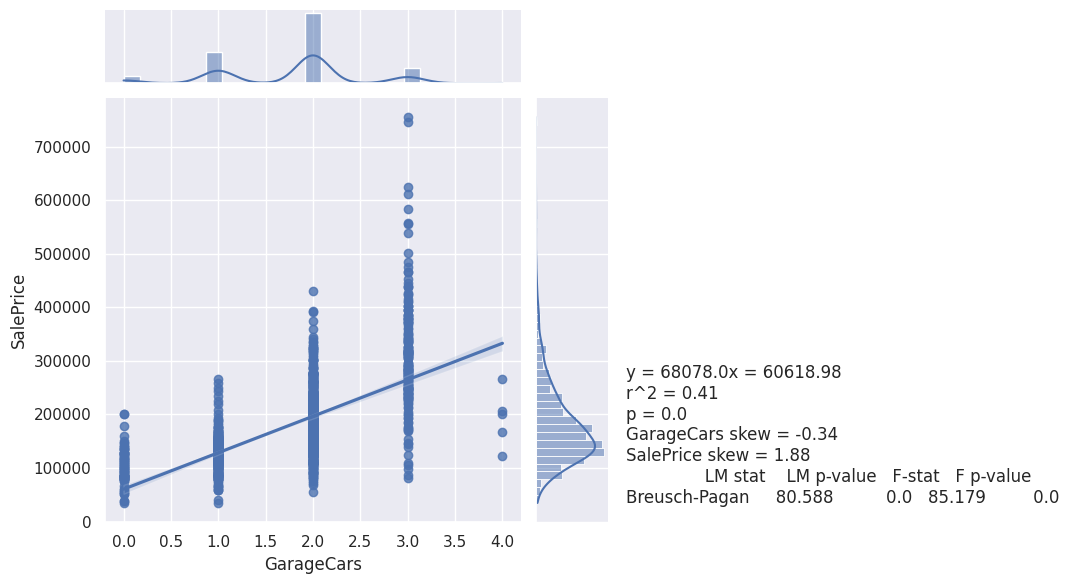

Unable to calculate white hetroscedasticity


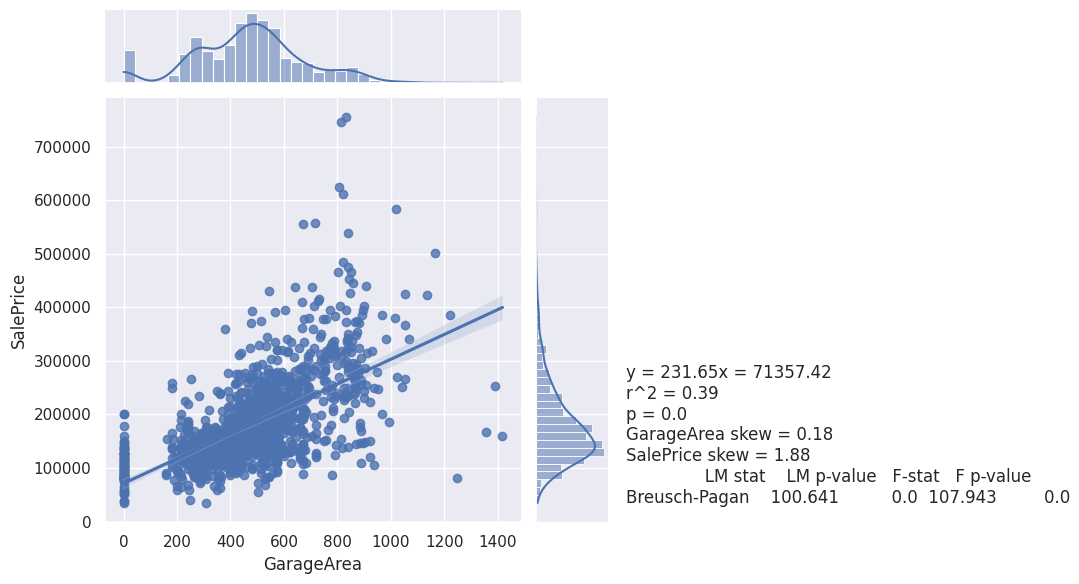

 Y n= 1340; and N n=90; No ttest performed
 Y n= 1340; and P n=30; No ttest performed
 N n= 90; and P n=30; No ttest performed


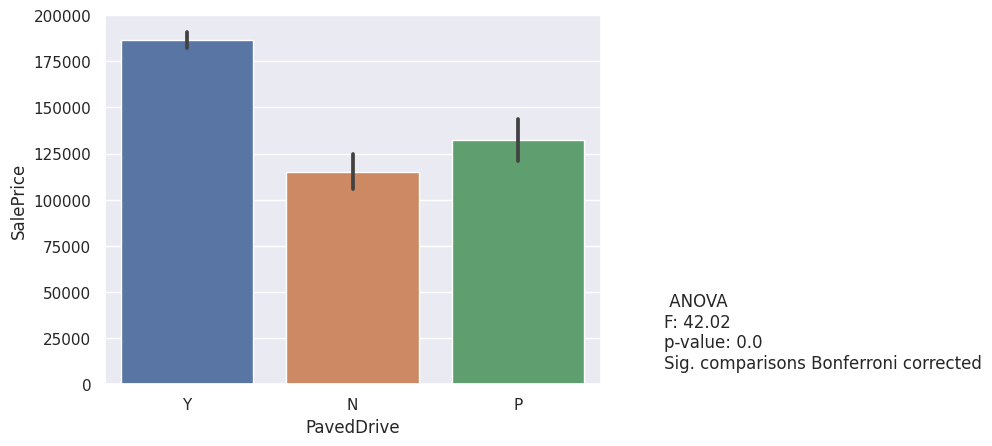

Unable to calculate white hetroscedasticity


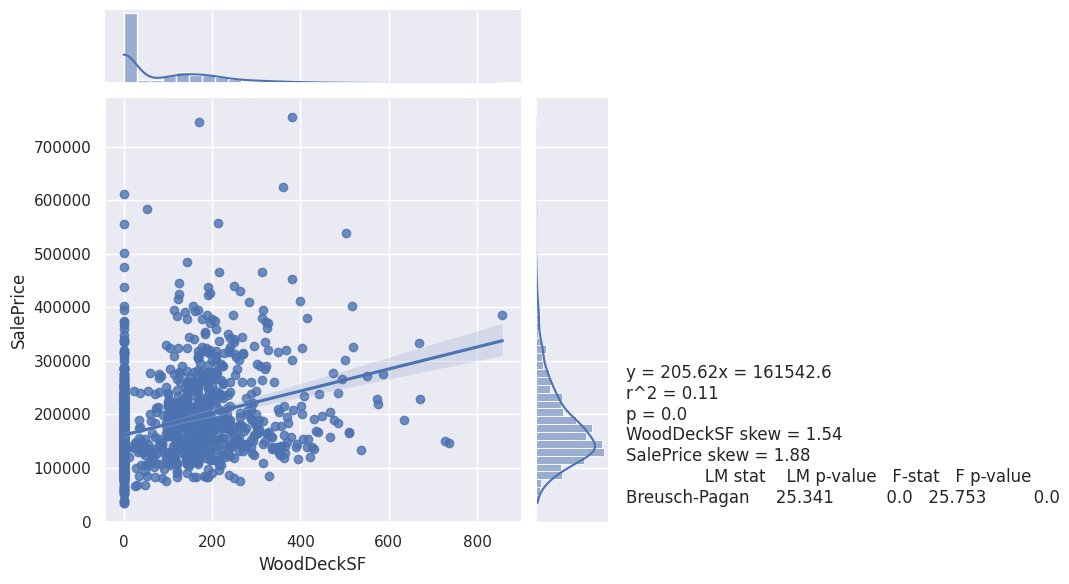

Unable to calculate white hetroscedasticity


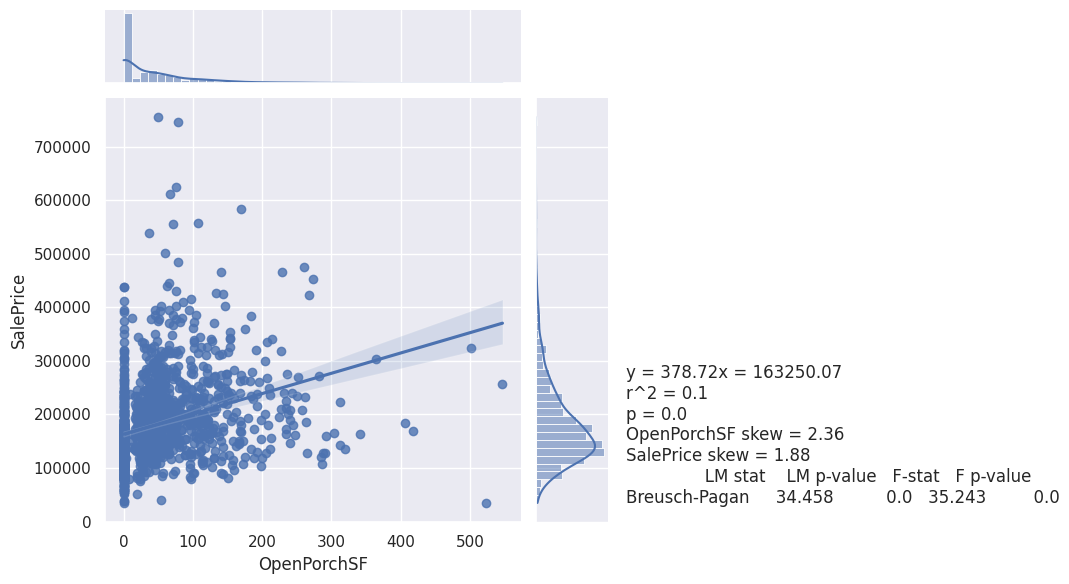

Unable to calculate white hetroscedasticity


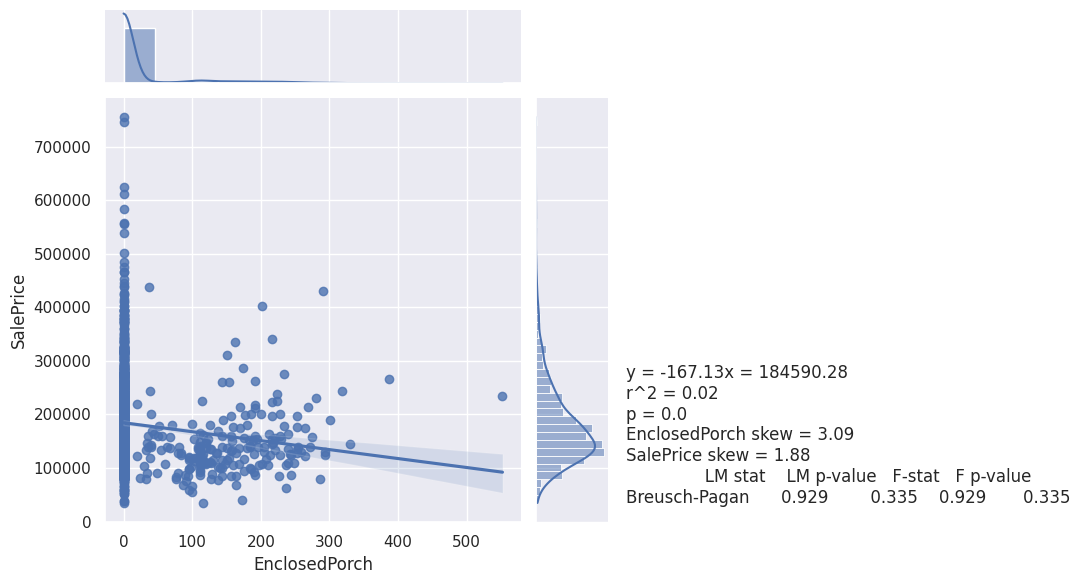

Unable to calculate white hetroscedasticity


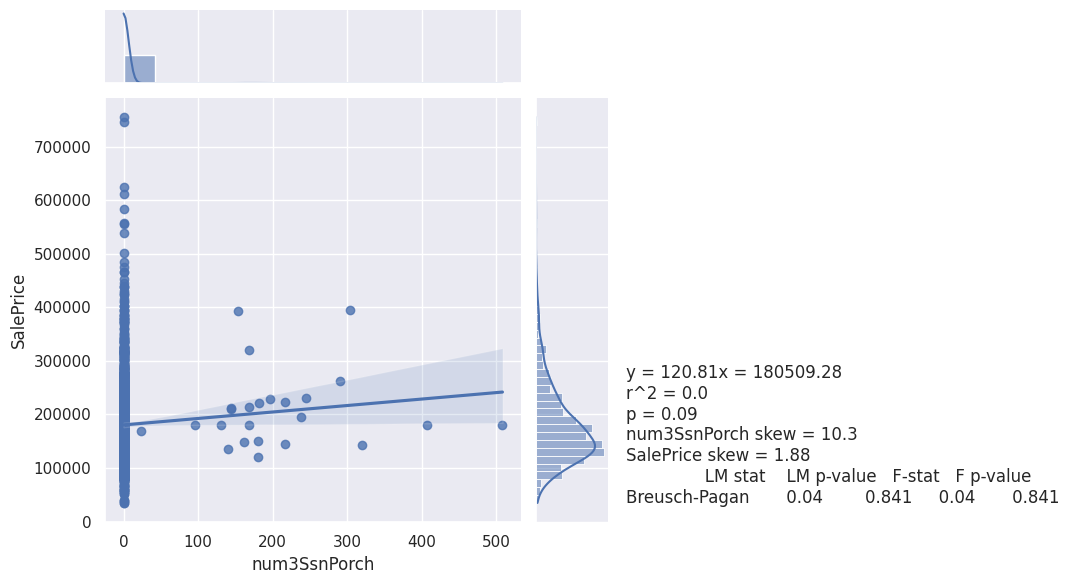

Unable to calculate white hetroscedasticity


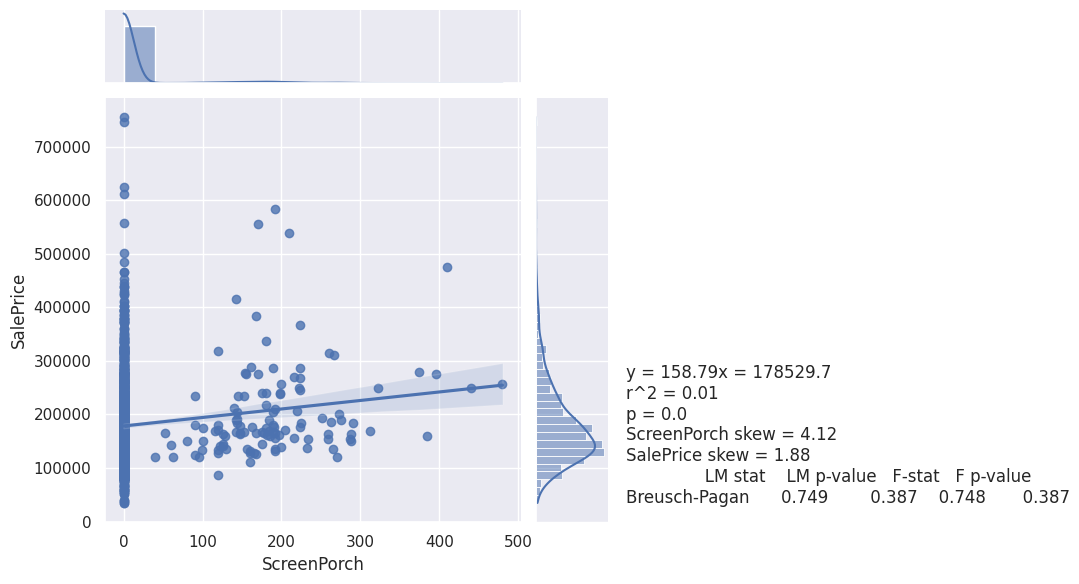

Unable to calculate white hetroscedasticity


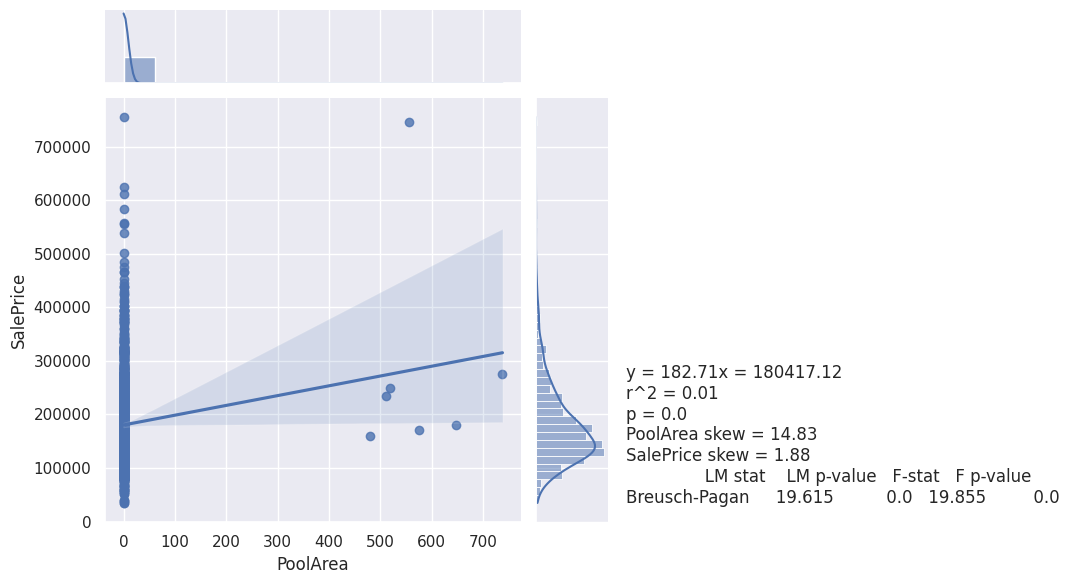

Unable to calculate white hetroscedasticity


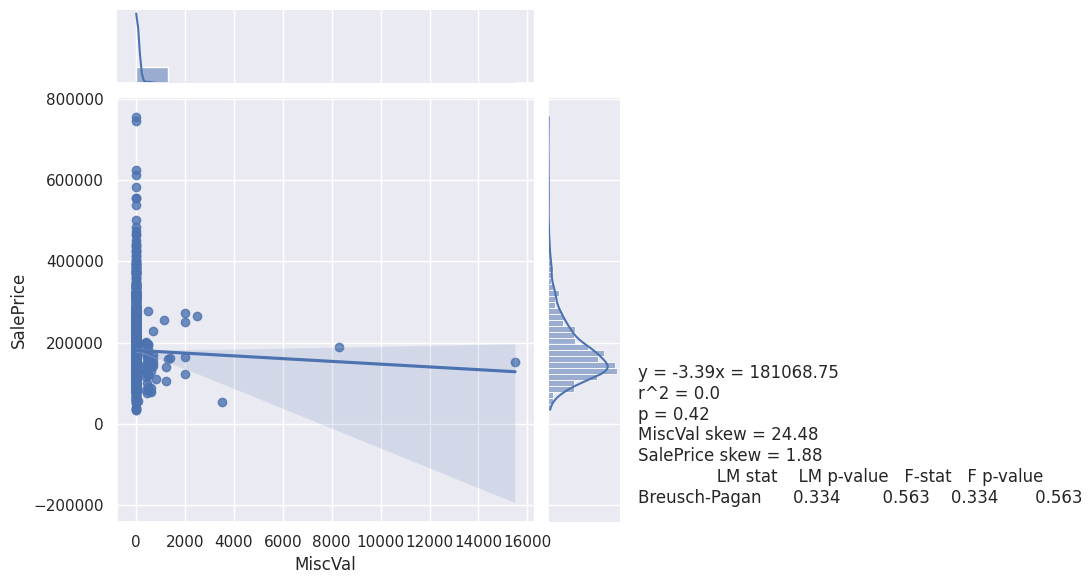

Unable to calculate white hetroscedasticity


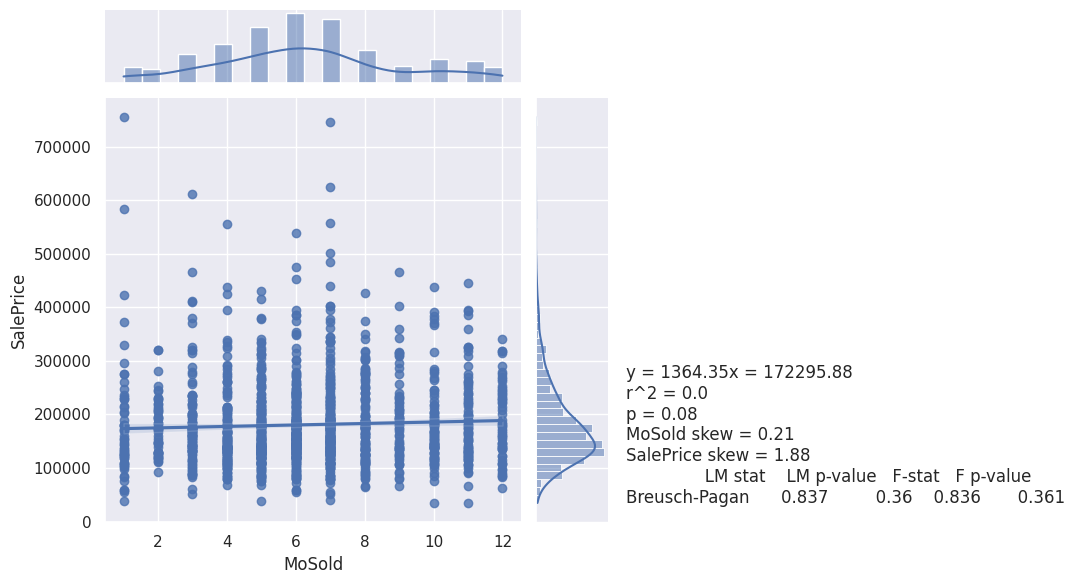

Unable to calculate white hetroscedasticity


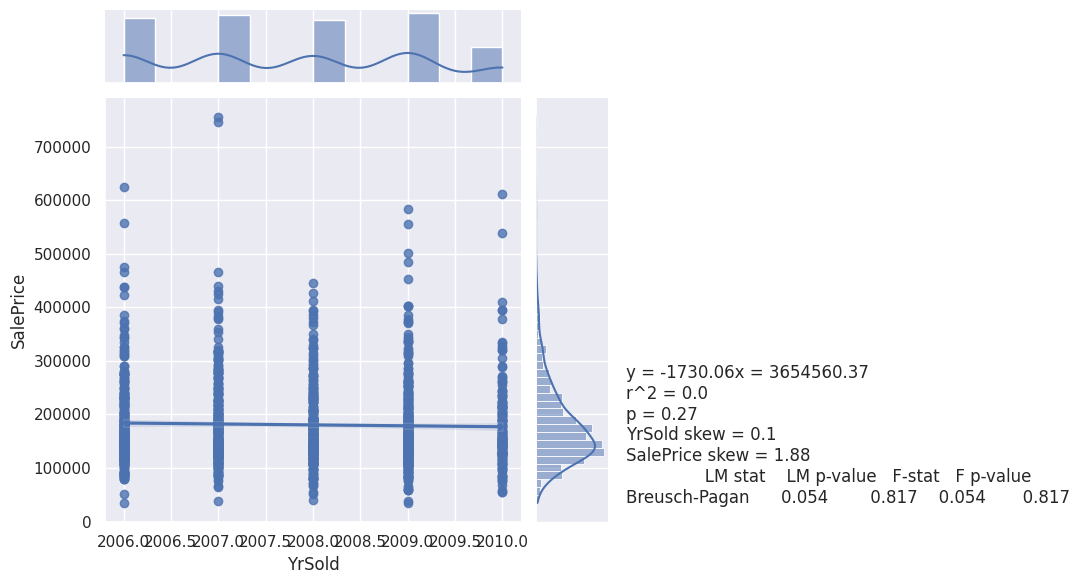

 WD n= 1267; and New n=122; No ttest performed
 WD n= 1267; and COD n=43; No ttest performed
 WD n= 1267; and ConLD n=9; No ttest performed
 WD n= 1267; and ConLI n=5; No ttest performed
 WD n= 1267; and CWD n=4; No ttest performed
 WD n= 1267; and ConLw n=5; No ttest performed
 WD n= 1267; and Con n=2; No ttest performed
 WD n= 1267; and Oth n=3; No ttest performed
 New n= 122; and COD n=43; No ttest performed
 New n= 122; and ConLD n=9; No ttest performed
 New n= 122; and ConLI n=5; No ttest performed
 New n= 122; and CWD n=4; No ttest performed
 New n= 122; and ConLw n=5; No ttest performed
 New n= 122; and Con n=2; No ttest performed
 New n= 122; and Oth n=3; No ttest performed
 COD n= 43; and ConLD n=9; No ttest performed
 COD n= 43; and ConLI n=5; No ttest performed
 COD n= 43; and CWD n=4; No ttest performed
 COD n= 43; and ConLw n=5; No ttest performed
 COD n= 43; and Con n=2; No ttest performed
 COD n= 43; and Oth n=3; No ttest performed
 ConLD n= 9; and ConLI n=5; No ttest pe

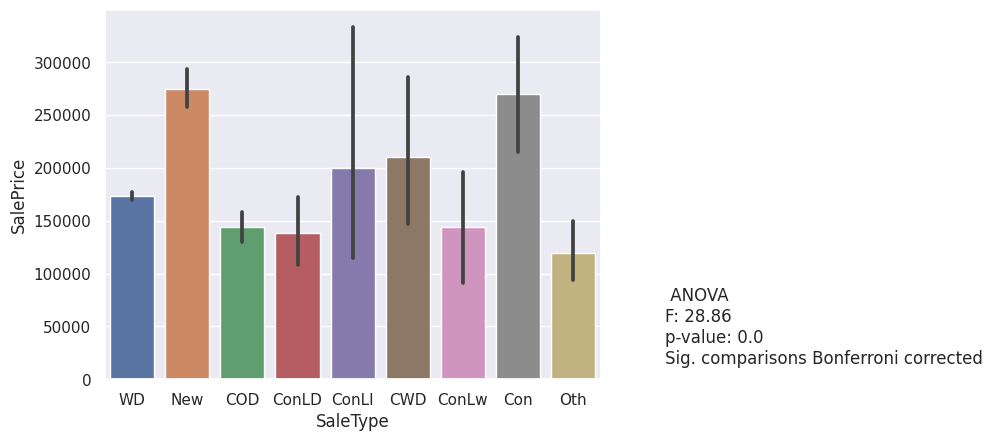

 Normal n= 1198; and Abnorml n=101; No ttest performed
 Normal n= 1198; and Partial n=125; No ttest performed
 Normal n= 1198; and AdjLand n=4; No ttest performed
 Normal n= 1198; and Alloca n=12; No ttest performed
 Normal n= 1198; and Family n=20; No ttest performed
 Abnorml n= 101; and Partial n=125; No ttest performed
 Abnorml n= 101; and AdjLand n=4; No ttest performed
 Abnorml n= 101; and Alloca n=12; No ttest performed
 Abnorml n= 101; and Family n=20; No ttest performed
 Partial n= 125; and AdjLand n=4; No ttest performed
 Partial n= 125; and Alloca n=12; No ttest performed
 Partial n= 125; and Family n=20; No ttest performed
 AdjLand n= 4; and Alloca n=12; No ttest performed
 AdjLand n= 4; and Family n=20; No ttest performed
 Alloca n= 12; and Family n=20; No ttest performed


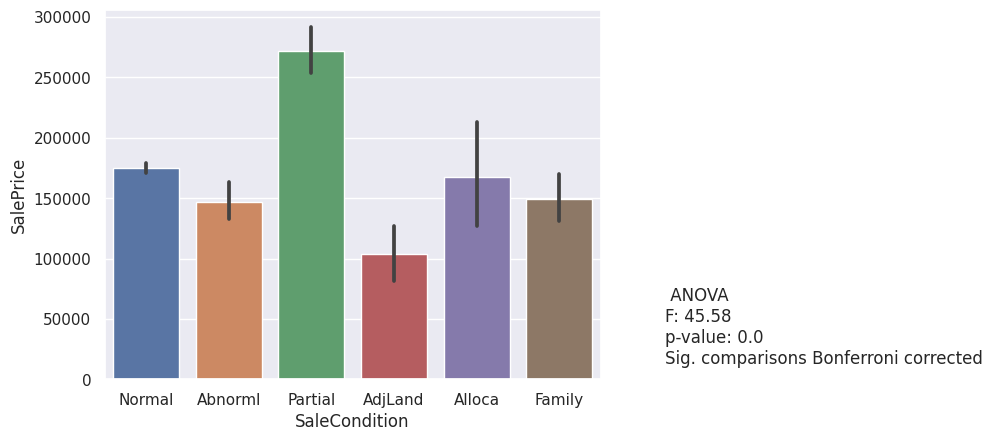

r        F  X2 p-value
OverallQual    0.791      NaN NaN     0.0
GrLivArea      0.709      NaN NaN     0.0
GarageCars     0.640      NaN NaN     0.0
GarageArea     0.623      NaN NaN     0.0
TotalBsmtSF    0.614      NaN NaN     0.0
num1stFlrSF    0.606      NaN NaN     0.0
FullBath       0.561      NaN NaN     0.0
TotRmsAbvGrd   0.534      NaN NaN     0.0
YearBuilt      0.523      NaN NaN     0.0
YearRemodAdd   0.507      NaN NaN     0.0
Fireplaces     0.467      NaN NaN     0.0
BsmtFinSF1     0.386      NaN NaN     0.0
WoodDeckSF     0.324      NaN NaN     0.0
num2ndFlrSF    0.319      NaN NaN     0.0
OpenPorchSF    0.316      NaN NaN     0.0
HalfBath       0.284      NaN NaN     0.0
LotArea        0.264      NaN NaN     0.0
BsmtFullBath   0.227      NaN NaN     0.0
BsmtUnfSF      0.214      NaN NaN     0.0
BedroomAbvGr   0.168      NaN NaN     0.0
KitchenAbvGr  -0.136      NaN NaN     0.0
EnclosedPorch -0.129      NaN NaN     0.0
ScreenPorch    0.111      NaN NaN     0.0
PoolArea       0.092      NaN NaN     0.0
MSSubClass    -0.084      NaN NaN   0.001
OverallCond   -0.078      NaN NaN   0.003
MoSold         0.046      NaN NaN   0.076
num3SsnPorch   0.045      NaN NaN   0.089
YrSold        -0.029      NaN NaN   0.269
LowQualFinSF  -0.026      NaN NaN   0.328
Id            -0.022      NaN NaN   0.403
MiscVal       -0.021      NaN NaN   0.418
BsmtHalfBath  -0.017      NaN NaN    0.52
BsmtFinSF2    -0.011      NaN NaN   0.664
ExterQual        NaN  443.335 NaN     0.0
KitchenQual      NaN  407.806 NaN     0.0
Foundation       NaN  100.254 NaN     0.0
CentralAir       NaN   98.305 NaN     0.0
HeatingQC        NaN   88.394 NaN     0.0
Neighborhood     NaN   71.785 NaN     0.0
SaleCondition    NaN   45.578 NaN     0.0
MSZoning         NaN   43.840 NaN     0.0
PavedDrive       NaN   42.024 NaN     0.0
LotShape         NaN   40.133 NaN     0.0
SaleType         NaN   28.863 NaN     0.0
HouseStyle       NaN   19.595 NaN     0.0
Exterior1st      NaN   18.612 NaN     0.0
RoofStyle        NaN   17.805 NaN     0.0
Exterior2nd      NaN   17.501 NaN     0.0
BldgType         NaN   13.011 NaN     0.0
LandContour      NaN   12.850 NaN     0.0
ExterCond        NaN    8.799 NaN     0.0
LotConfig        NaN    7.810 NaN     0.0
RoofMatl         NaN    6.727 NaN     0.0
Condition1       NaN    6.118 NaN     0.0
Heating          NaN    4.260 NaN   0.001
Functional       NaN    4.058 NaN     0.0
Street           NaN    2.459 NaN   0.117
Condition2       NaN    2.074 NaN   0.043
LandSlope        NaN    1.959 NaN   0.141
Utilities        NaN    0.299 NaN   0.585
LotFrontage      NaN      NaN NaN   nulls
Alley            NaN      NaN NaN   nulls
MasVnrType       NaN      NaN NaN   nulls
MasVnrArea       NaN      NaN NaN   nulls
BsmtQual         NaN      NaN NaN   nulls
BsmtCond         NaN      NaN NaN   nulls
BsmtExposure     NaN      NaN NaN   nulls
BsmtFinType1     NaN      NaN NaN   nulls
BsmtFinType2     NaN      NaN NaN   nulls
Electrical       NaN      NaN NaN   nulls
FireplaceQu      NaN      NaN NaN   nulls
GarageType       NaN      NaN NaN   nulls
GarageYrBlt      NaN      NaN NaN   nulls
GarageFinish     NaN      NaN NaN   nulls
GarageQual       NaN      NaN NaN   nulls
GarageCond       NaN      NaN NaN   nulls
PoolQC           NaN      NaN NaN   nulls
Fence            NaN      NaN NaN   nulls
MiscFeature      NaN      NaN NaN   nulls

In [141]:
bivstats(df, 'SalePrice')

# Multivariate analysis

# Train test split

# ML algorithms

# Keras

# PyTorch